In [1]:
import glob
import os

import numpy as np
import pandas as pd
import scipy as sp

from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def bumpchart(df, show_rank_axis= True, rank_axis_distance= 1.1, 
              ax= None, scatter= False, holes= False,
              line_args= {}, scatter_args= {}, hole_args= {}, color_func=None):
    
    if ax is None:
        left_yaxis= plt.gca()
    else:
        left_yaxis = ax

    # Creating the right axis.
    right_yaxis = left_yaxis.twinx()
    
    axes = [left_yaxis, right_yaxis]
    
    # Creating the far right axis if show_rank_axis is True
    if show_rank_axis:
        far_right_yaxis = left_yaxis.twinx()
        axes.append(far_right_yaxis)
    
    for col in df.columns:
        y = df[col]
        x = df.index.values
        # Plotting blank points on the right axis/axes 
        # so that they line up with the left axis.
        for axis in axes[1:]:
            axis.plot(x, y, alpha= 0)

        left_yaxis.plot(x, y, **line_args, solid_capstyle='round')
        
        # Adding scatter plots
        if scatter:
            if color_func is not None:
                left_yaxis.scatter(x, y, color=color_func(col), **scatter_args)
            else:
                left_yaxis.scatter(x, y, **scatter_args)
            
            #Adding see-through holes
            if holes:
                bg_color = left_yaxis.get_facecolor()
                left_yaxis.scatter(x, y, color= bg_color, **hole_args)

    # Number of lines
    lines = len(df.columns)

    y_ticks = [*range(1, lines + 1)]
    
    # Configuring the axes so that they line up well.
    for axis in axes:
        axis.invert_yaxis()
        axis.set_yticks(y_ticks)
        axis.set_ylim((lines + 0.5, 0.5))
    
    # Sorting the labels to match the ranks.
    left_labels = df.iloc[0].sort_values().index
    right_labels = df.iloc[-1].sort_values().index
    
    left_yaxis.set_yticklabels(left_labels)
    right_yaxis.set_yticklabels(right_labels)
    
    # Setting the position of the far right axis so that it doesn't overlap with the right axis
    if show_rank_axis:
        far_right_yaxis.spines["right"].set_position(("axes", rank_axis_distance))
    
    return axes

In [3]:
model_output_files = glob.glob("./doi_outputs/*.csv")
model_output_files

['./doi_outputs/sBRRM.csv',
 './doi_outputs/LFTM.csv',
 './doi_outputs/ICM.csv',
 './doi_outputs/SLFTM.csv',
 './doi_outputs/DWM.csv',
 './doi_outputs/LATM.csv',
 './doi_outputs/SLATM.csv',
 './doi_outputs/BRRM.csv']

In [4]:
model_outputs = { os.path.basename(mofile)[:-4] : pd.read_csv(mofile) for mofile in model_output_files }

In [5]:
for m in model_outputs:
    model_outputs[m]['model'] = m
    
print({m: model_outputs[m].shape for m in model_outputs})

# set columns
common_columns = ['model', 'total_nodes', 'init_infection', 'beta', 'final_infection', 'total_edges', 'count_edges_II', 'count_edges_IS', 'count_edges_SS', 'count_edges_SI', 'count_S_nodes_with_I_neighbors', 'count_edges_II_prev_IS', 'count_edges_II_prev_SS', 'count_edges_IS_prev_SS', 'net_percent_value', 'early', 'mid', 'late', 'final_const_state_at', 'sim_stopped_at', 'InfectionAtStep']
all_model_columns_list = set()
model_columns = {}
for m in model_outputs:
    model_outputs[m].drop(columns=['Unnamed: 0', 'x'], inplace=True, errors='ignore')
    model_specific_columns = set(model_outputs[m].columns).difference(common_columns)
    model_columns[m] = model_specific_columns
    all_model_columns_list.update( model_specific_columns )
    
all_model_columns_list = list(all_model_columns_list)
all_model_columns_list.sort()
all_columns = all_model_columns_list + common_columns

print(all_model_columns_list)
print(model_columns)
print(all_columns)

df = pd.concat([model_outputs[m] for m in model_outputs], ignore_index=True)
df = df[all_columns]
df

{'sBRRM': (75810, 24), 'LFTM': (75810, 24), 'ICM': (75810, 24), 'SLFTM': (151620, 24), 'DWM': (606480, 24), 'LATM': (75810, 24), 'SLATM': (227430, 24), 'BRRM': (75810, 24)}
['BRRM_q', 'DWM_dt', 'DWM_q', 'ICM_q', 'LATM_t', 'LFTM_t', 'SLATM_p', 'SLATM_t', 'SLFTM_p', 'SLFTM_t', 'sBRRM_q']
{'sBRRM': {'sBRRM_q'}, 'LFTM': {'LFTM_t'}, 'ICM': {'ICM_q'}, 'SLFTM': {'SLFTM_t', 'SLFTM_p'}, 'DWM': {'DWM_q', 'DWM_dt'}, 'LATM': {'LATM_t'}, 'SLATM': {'SLATM_p', 'SLATM_t'}, 'BRRM': {'BRRM_q'}}
['BRRM_q', 'DWM_dt', 'DWM_q', 'ICM_q', 'LATM_t', 'LFTM_t', 'SLATM_p', 'SLATM_t', 'SLFTM_p', 'SLFTM_t', 'sBRRM_q', 'model', 'total_nodes', 'init_infection', 'beta', 'final_infection', 'total_edges', 'count_edges_II', 'count_edges_IS', 'count_edges_SS', 'count_edges_SI', 'count_S_nodes_with_I_neighbors', 'count_edges_II_prev_IS', 'count_edges_II_prev_SS', 'count_edges_IS_prev_SS', 'net_percent_value', 'early', 'mid', 'late', 'final_const_state_at', 'sim_stopped_at', 'InfectionAtStep']


BRRM_q  DWM_dt  DWM_q  ICM_q  LATM_t  LFTM_t  SLATM_p  SLATM_t   
0           NaN     NaN    NaN    NaN     NaN     NaN      NaN      NaN  \
1           NaN     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
2           NaN     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
3           NaN     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
4           NaN     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
...         ...     ...    ...    ...     ...     ...      ...      ...   
1364575    0.75     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1364576    0.80     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1364577    0.85     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1364578    0.90     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1364579    0.95     NaN    NaN    NaN     NaN     NaN      NaN      NaN   

         SLFTM_p  SLFTM_t  ...  count_edges_II_prev_IS count_edges_II_prev_SS   
0            NaN      NaN  ...                0.046401               0.026542  \
1            NaN      NaN  ...                0.059958               0.026924   
2            NaN      NaN  ...                0.054802               0.027497   
3            NaN      NaN  ...                0.044682               0.015467   
4            NaN      NaN  ...                0.037426               0.019668   
...          ...      ...  ...                     ...                    ...   
1364575      NaN      NaN  ...                0.213941               0.257214   
1364576      NaN      NaN  ...                0.220423               0.291755   
1364577      NaN      NaN  ...                0.222152               0.253513   
1364578      NaN      NaN  ...                0.232680               0.260406   
1364579      NaN      NaN  ...                0.233500               0.260306   

         count_edges_IS_prev_SS  net_percent_value  early  mid  late   
0                           0.0          51.281338     43   93   375  \
1                           0.0         124.674287     18   40   145   
2                           0.0         137.101070     14   38   110   
3                           0.0         135.767319      8   20    73   
4                           0.0         143.496107      6   15    47   
...                         ...                ...    ...  ...   ...   
1364575                     0.0        1977.687121      0    1     3   
1364576                     0.0        2003.873562      0    1     3   
1364577                     0.0        1965.711890      0    1     2   
1364578                     0.0        2003.086905      0    1     2   
1364579                     0.0        2036.404930      0    1     2   

         final_const_state_at  sim_stopped_at   
0                         923            2001  \
1                         624            2001   
2                         331            2001   
3                         178            2001   
4                         428            2001   
...                       ...             ...   
1364575                    16            2001   
1364576                    25            2001   
1364577                    19            2001   
1364578                    13            2001   
1364579                    12            2001   

                                           InfectionAtStep  
0        [4, 4, 8, 5, 5, 11, 1, 5, 7, 6, 3, 5, 5, 6, 2,...  
1        [22, 20, 12, 16, 15, 13, 9, 17, 11, 9, 8, 10, ...  
2        [23, 20, 26, 19, 16, 13, 11, 9, 11, 10, 14, 9,...  
3        [25, 26, 27, 19, 16, 11, 10, 8, 13, 5, 7, 5, 1...  
4        [25, 20, 39, 23, 17, 11, 14, 10, 9, 4, 8, 10, ...  
...                                                    ...  
1364575  [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...  
1364576  [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...  
1364577  [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...  
1364578   [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]  
1364579   

## Figure 1 Final Fraction of Infection

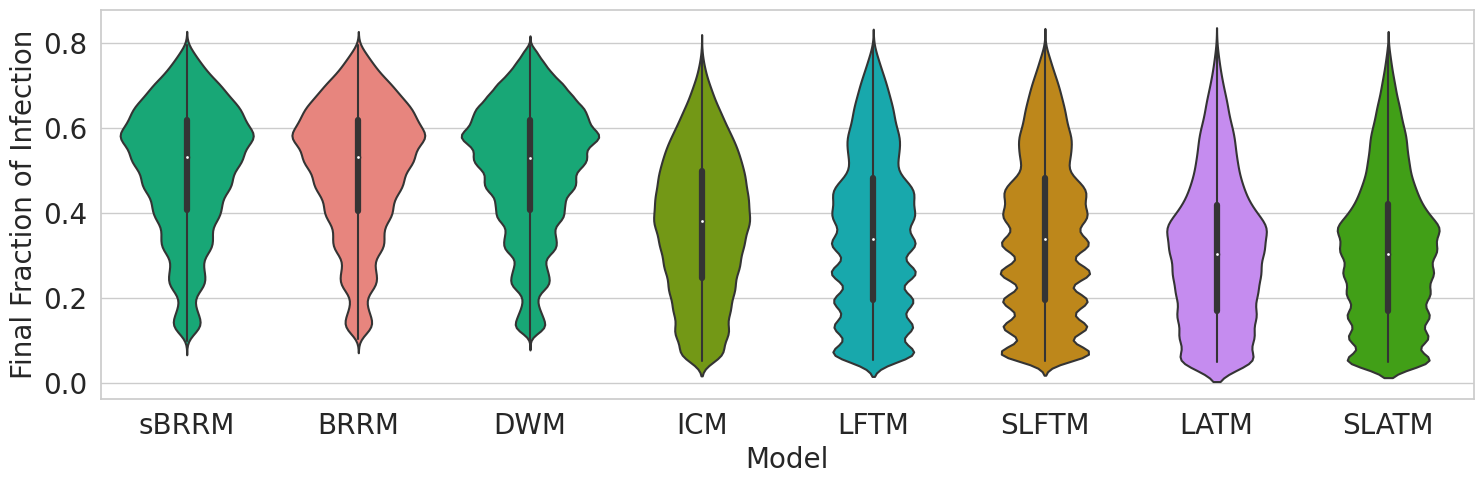

In [7]:
pdefColors = ["#F8766D","#7CAE00","#00BFC4","#C77CFF", "#D89000", "#A3A500", "#39B600", "#00BF7D", "#00B0F6", "#9590FF", "#E76BF3", "#FF62BC"]
# [ '#1f77b4',  #// muted blue
#     '#ff7f0e',  #// safety orange
#     '#2ca02c',  #// cooked asparagus green
#     '#d62728',  #// brick red
#     '#9467bd',  #// muted purple
#     '#8c564b',  #// chestnut brown
#     '#e377c2',  #// raspberry yogurt pink
#     '#7f7f7f',  #// middle gray
#     '#bcbd22',  #// curry yellow-green
#     '#17becf'   #// blue-teal
# ]

cols = {'sBRRM': pdefColors[7], 'BRRM': pdefColors[0], 'ICM': pdefColors[1], 'LFTM': pdefColors[2], 'LATM': pdefColors[3], 'SLFTM': pdefColors[4], 'DWM': pdefColors[7], 'SLATM': pdefColors[6], }
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.violinplot(data=df[ (df['SLATM_t'].isnull()) &  (df['LATM_t'].isnull()) | (df['LATM_t'] < 6) & (df['SLATM_t'].isnull()) | (df['LATM_t'].isnull()) & (df['SLATM_t'] < 6) ], y='final_infection', x='model', inner="box", palette=cols, order=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Final Fraction of Infection')
plt.ylabel('Final Fraction of Infection', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('FinalFractionOfInfection.png')
plt.show()

In [8]:
def calc_moments(in_model_name, in_numbers_series):
    ret = {}
    ret['model'] = in_model_name
    ret['mean'] = in_numbers_series.mean()
    ret['std'] = in_numbers_series.std()
    ret['skewness'] = in_numbers_series.skew()
    skt = sp.stats.skewtest(in_numbers_series)
    ret['skew_test_Statistic'] = skt.statistic
    ret['skew_test_Pvalue'] = skt.pvalue
    ek = in_numbers_series.kurtosis()
    ret['kurtosis'] = ek + 3.0
    ret['excess_kurtosis'] = ek
    kut = sp.stats.kurtosistest(in_numbers_series)
    ret['kurtosis_test_Statistic'] = kut.statistic
    ret['kurtosis_test_Pvalue'] = kut.pvalue
    return ret

t = df.groupby('model').apply(lambda x: calc_moments(x['model'].iloc[0], x['final_infection']) )

In [10]:
pd.set_option("display.precision", 4)
pd.DataFrame.from_records(t.values).set_index('model').reindex(index=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])

mean     std  skewness  skew_test_Statistic  skew_test_Pvalue   
model                                                                    
sBRRM  0.5036  0.1523   -0.5812             -60.7969        0.0000e+00  \
BRRM   0.5036  0.1524   -0.5810             -60.7731        0.0000e+00   
DWM    0.5036  0.1523   -0.5805            -171.7621        0.0000e+00   
ICM    0.3735  0.1648   -0.0382              -4.2963        1.7364e-05   
LFTM   0.3507  0.1852    0.2233              24.7959       9.9168e-136   
SLFTM  0.3505  0.1852    0.2246              35.2754       1.4005e-272   
LATM   0.2369  0.1346    0.6882              70.2919        0.0000e+00   
SLATM  0.2369  0.1347    0.6895             121.9302        0.0000e+00   

       kurtosis  excess_kurtosis  kurtosis_test_Statistic   
model                                                       
sBRRM    2.6614          -0.3386                 -23.0507  \
BRRM     2.6613          -0.3387                 -23.0656   
DWM      2.6597          -0.3403                 -65.6158   
ICM      2.1773          -0.8227                 -84.7469   
LFTM     2.0920          -0.9080                -104.1679   
SLFTM    2.0926          -0.9074                -147.1254   
LATM     3.5405           0.5405                  24.1228   
SLATM    3.5440           0.5440                  41.9793   

       kurtosis_test_Pvalue  
model                        
sBRRM           1.4485e-117  
BRRM            1.0259e-117  
DWM              0.0000e+00  
ICM              0.0000e+00  
LFTM             0.0000e+00  
SLFTM            0.0000e+00  
LATM            1.4405e-128  
SLATM            0.0000e+00

In [15]:
def calcSimilarity(m1, m2, colname, alternative='two-sided'):
    w = sp.stats.ranksums(df[df['model'] == m1][colname].tolist(), df[df['model'] == m2][colname].tolist(), alternative=alternative)
    #u = sp.stats.mannwhitneyu(df[df['model'] == m1]['final_infection'].tolist(), df[df['model'] == m2]['final_infection'].tolist())
    #print(f"{m1} & {m2} wilcoxon : ", w)
    #print(f"{m1} & {m2} mann-whitney : ", u)
    return w

def compare_ranksum(colname, alternative='two-sided'):
    model_names_list = ['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM']
    num_models = len(model_names_list)
    m = np.zeros((num_models,num_models))
    v = np.zeros((num_models,num_models))
    with tqdm(total=49) as pbar:
        for m1 in range(7):
            for m2 in range(7):
                #print(m1,m2)
                pbar.update(1)
                s = calcSimilarity(model_names_list[m1],model_names_list[m2], colname, alternative=alternative)
                m[m1,m2] = s.pvalue
                v[m1,m2] = s.statistic
    #---
    pd.set_option("display.precision", 2)
    pd.set_option('display.float_format', lambda x: '%.2f' % x)
    print(colname)
    print("\nPvalues:\n", pd.DataFrame(m, columns=model_names_list, index=model_names_list) )
    print("\nStatistic:\n", pd.DataFrame(v, columns=model_names_list, index=model_names_list) )
    sns.heatmap(pd.DataFrame(m, columns=model_names_list, index=model_names_list), annot=True, fmt=".2f") #, cmap='vlag')
    plt.title(colname)
    plt.show()

100%|██████████| 49/49 [00:13<00:00,  3.69it/s]


final_infection

Pvalues:
        sBRRM  BRRM  DWM  ICM  LFTM  SLFTM  LATM  SLATM
sBRRM   1.00  0.99 0.96 0.00  0.00   0.00  0.00   0.00
BRRM    0.99  1.00 0.95 0.00  0.00   0.00  0.00   0.00
DWM     0.96  0.95 1.00 0.00  0.00   0.00  0.00   0.00
ICM     0.00  0.00 0.00 1.00  0.00   0.00  0.00   0.00
LFTM    0.00  0.00 0.00 0.00  1.00   0.84  0.00   0.00
SLFTM   0.00  0.00 0.00 0.00  0.84   1.00  0.00   0.00
LATM    0.00  0.00 0.00 0.00  0.00   0.00  1.00   0.00
SLATM   0.00  0.00 0.00 0.00  0.00   0.00  0.00   0.00

Statistic:
         sBRRM    BRRM     DWM     ICM    LFTM   SLFTM   LATM  SLATM
sBRRM    0.00   -0.02    0.04  148.49  158.43  183.10 264.85   0.00
BRRM     0.02    0.00    0.06  148.49  158.41  183.08 264.84   0.00
DWM     -0.04   -0.06    0.00  197.95  211.19  283.59 353.10   0.00
ICM   -148.49 -148.49 -197.95    0.00   28.32   32.92 161.33   0.00
LFTM  -158.43 -158.41 -211.19  -28.32    0.00    0.21 121.88   0.00
SLFTM -183.10 -183.08 -283.59  -32.92   -0.21    0.00 140

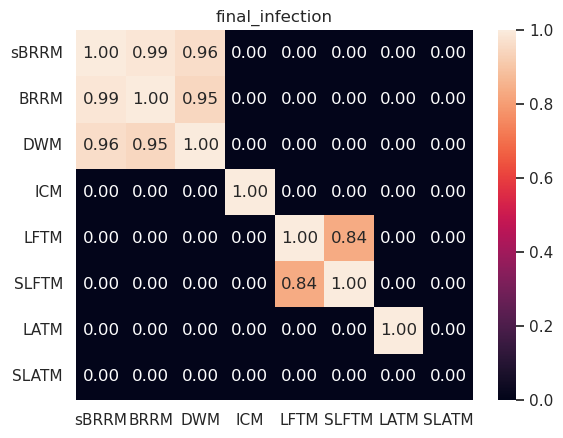

In [16]:
compare_ranksum('final_infection')

100%|██████████| 49/49 [00:12<00:00,  3.85it/s]


count_edges_IS

Pvalues:
        sBRRM  BRRM  DWM  ICM  LFTM  SLFTM  LATM  SLATM
sBRRM   1.00  0.99 0.98 0.00  0.00   0.00  0.00   0.00
BRRM    0.99  1.00 0.97 0.00  0.00   0.00  0.00   0.00
DWM     0.98  0.97 1.00 0.00  0.00   0.00  0.00   0.00
ICM     0.00  0.00 0.00 1.00  0.00   0.00  0.00   0.00
LFTM    0.00  0.00 0.00 0.00  1.00   0.88  0.00   0.00
SLFTM   0.00  0.00 0.00 0.00  0.88   1.00  0.00   0.00
LATM    0.00  0.00 0.00 0.00  0.00   0.00  1.00   0.00
SLATM   0.00  0.00 0.00 0.00  0.00   0.00  0.00   0.00

Statistic:
        sBRRM   BRRM    DWM     ICM    LFTM   SLFTM    LATM  SLATM
sBRRM   0.00  -0.01   0.02 -337.22 -309.95 -357.95 -319.47   0.00
BRRM    0.01   0.00   0.04 -337.22 -309.95 -357.95 -319.47   0.00
DWM    -0.02  -0.04   0.00 -449.62 -413.28 -554.54 -425.96   0.00
ICM   337.22 337.22 449.62    0.00  -52.68  -61.13 -189.41   0.00
LFTM  309.95 309.95 413.28   52.68    0.00   -0.15  -96.82   0.00
SLFTM 357.95 357.95 554.54   61.13    0.15    0.00 -111.59   0.00
LATM

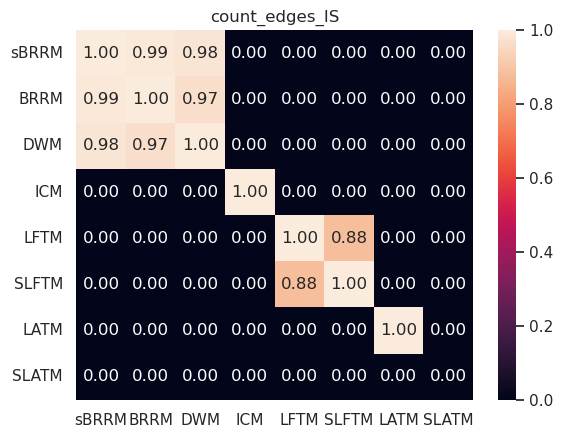

In [17]:
compare_ranksum('count_edges_IS')

100%|██████████| 49/49 [00:13<00:00,  3.57it/s]


count_edges_SS

Pvalues:
        sBRRM  BRRM  DWM  ICM  LFTM  SLFTM  LATM  SLATM
sBRRM   1.00  0.97 0.97 0.00  0.00   0.00  0.00   0.00
BRRM    0.97  1.00 0.93 0.00  0.00   0.00  0.00   0.00
DWM     0.97  0.93 1.00 0.00  0.00   0.00  0.00   0.00
ICM     0.00  0.00 0.00 1.00  0.00   0.00  0.00   0.00
LFTM    0.00  0.00 0.00 0.00  1.00   0.78  0.00   0.00
SLFTM   0.00  0.00 0.00 0.00  0.78   1.00  0.00   0.00
LATM    0.00  0.00 0.00 0.00  0.00   0.00  1.00   0.00
SLATM   0.00  0.00 0.00 0.00  0.00   0.00  0.00   0.00

Statistic:
        sBRRM   BRRM    DWM     ICM    LFTM   SLFTM    LATM  SLATM
sBRRM   0.00   0.04  -0.03 -117.24 -201.50 -232.88 -249.76   0.00
BRRM   -0.04   0.00  -0.09 -117.30 -201.54 -232.92 -249.80   0.00
DWM     0.03   0.09   0.00 -156.31 -268.67 -360.77 -333.02   0.00
ICM   117.24 117.30 156.31    0.00 -112.69 -130.38 -164.31   0.00
LFTM  201.50 201.54 268.67  112.69    0.00   -0.28  -48.09   0.00
SLFTM 232.88 232.92 360.77  130.38    0.28    0.00  -55.23   0.00
LATM

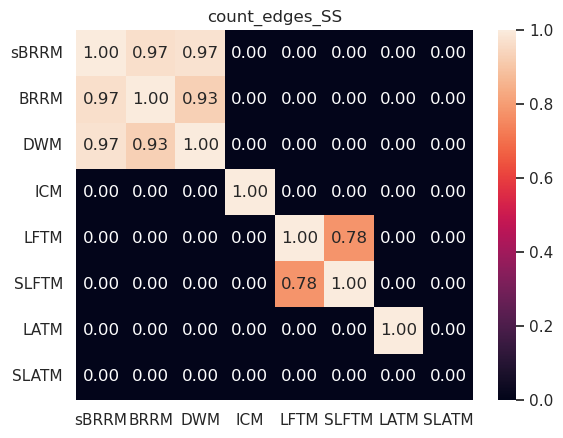

In [18]:
compare_ranksum('count_edges_SS')

## Figure 3,4 Final Fraction of Edges 

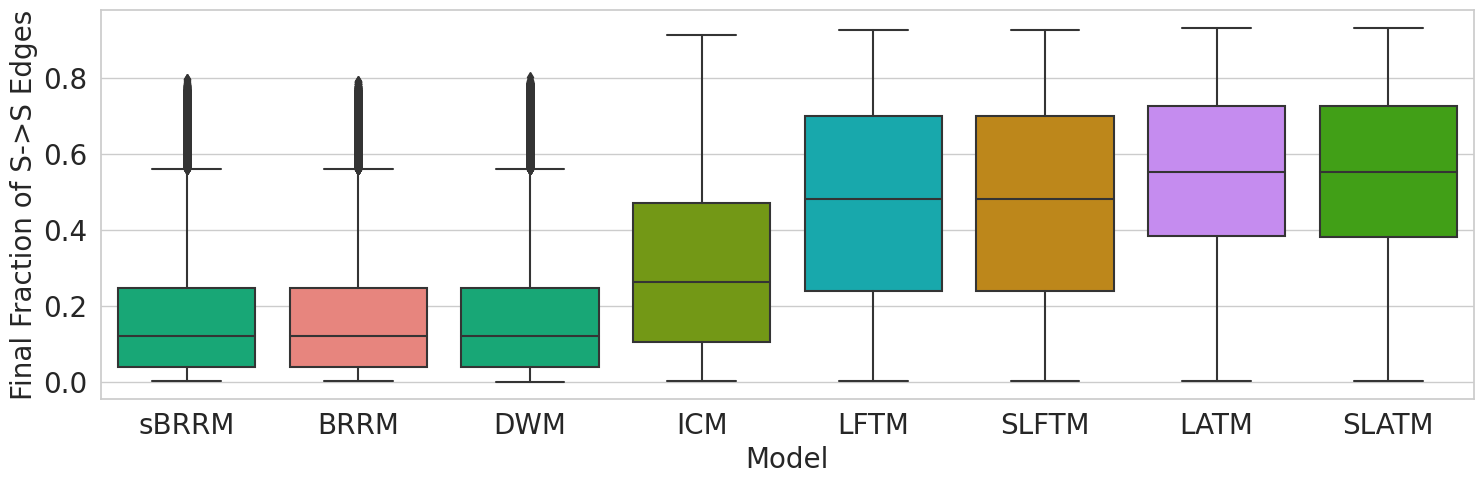

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
#sns.boxplot(data=df[(df['LATM_t'] < 5) | (df['LATM_t'].isnull())], y='count_edges_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
sns.boxplot(data=df, y='count_edges_SS', x='model', palette=cols, order=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#sns.swarmplot(data=df, y='count_edges_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
plt.ylabel('Final Fraction of S->S Edges', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('SS_edges.png')
plt.show()

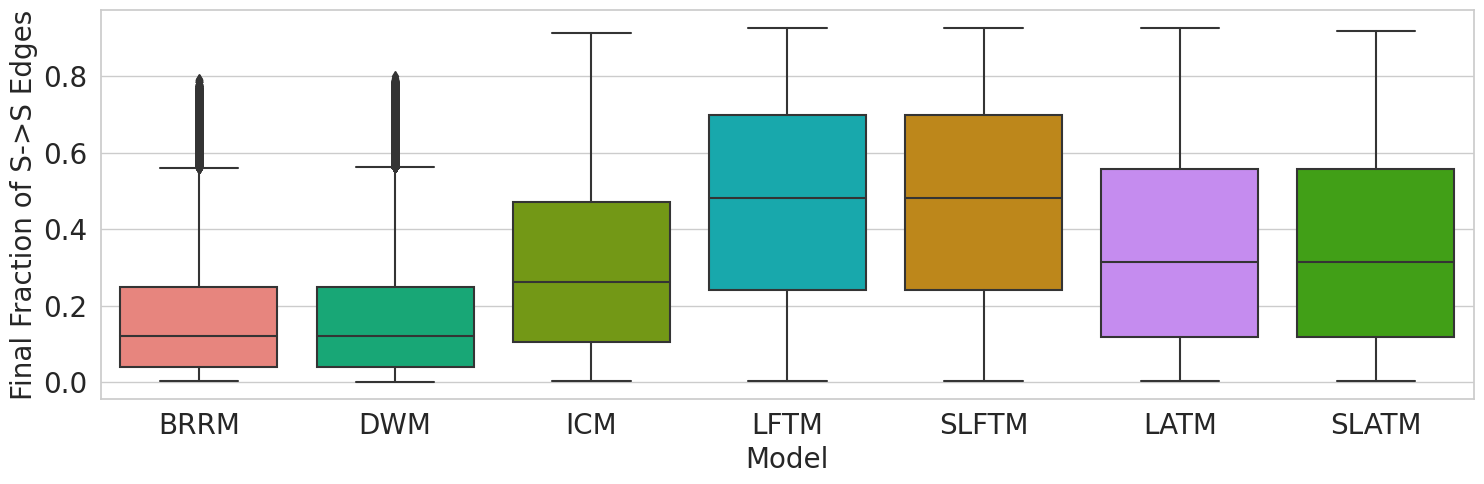

In [52]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
#sns.boxplot(data=df[(df['LATM_t'] < 5) | (df['LATM_t'].isnull())], y='count_edges_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
sns.boxplot(data=df[(df['SLATM_t'].isnull()) &  (df['LATM_t'].isnull()) | (df['LATM_t'] < 5) & (df['SLATM_t'].isnull()) | (df['LATM_t'].isnull()) & (df['SLATM_t'] < 5)], y='count_edges_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#sns.swarmplot(data=df, y='count_edges_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
plt.ylabel('Final Fraction of S->S Edges', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('SS_edges.png')
plt.show()

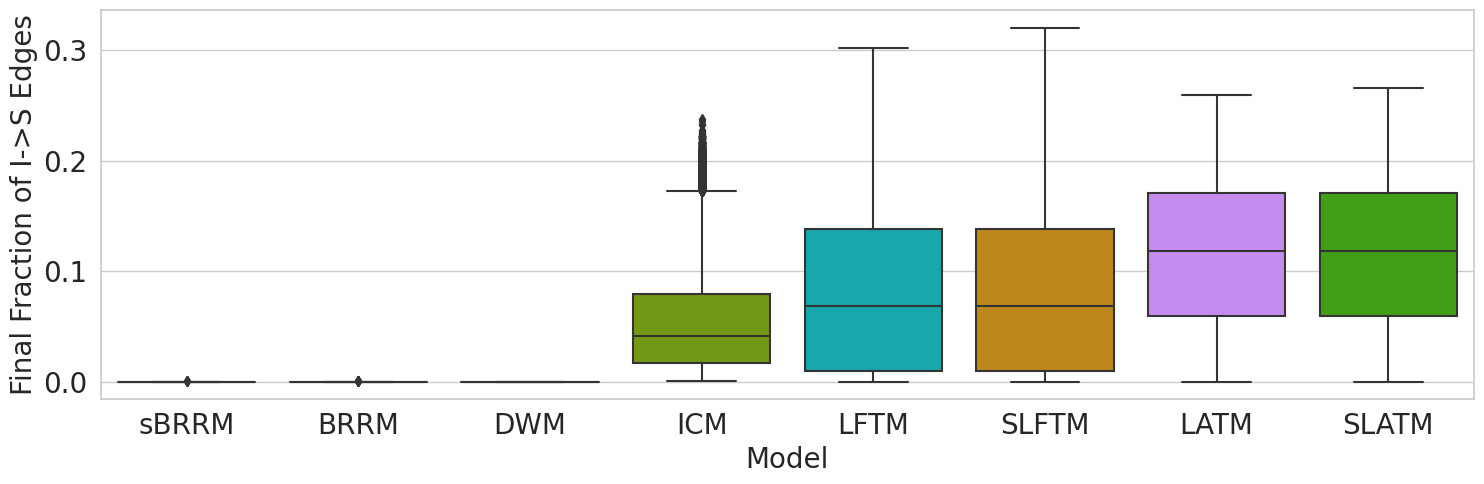

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='count_edges_IS', x='model', palette=cols, order=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
plt.ylabel('Final Fraction of I->S Edges', fontsize=20)
plt.xlabel('Model',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('IS_edges.png')
plt.show()

In [15]:
# fig, ax = plt.subplots(figsize=(15,5))
# sns.set(style='whitegrid')
# sns.violinplot(data=df, y='count_edges_II_prev_SS', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
# plt.title('Final Fraction of S->S Edges')
# plt.ylabel('Final Fraction of S->S Edges')
# plt.xlabel('Model')
# plt.show()

In [16]:
# fig, ax = plt.subplots(figsize=(15,5))
# sns.set(style='whitegrid')
# sns.kdeplot(data=df, x='count_edges_SS', hue='model',palette=cols)
# plt.title("Final Fraction of S->S Edges")
# plt.xlabel("Final Fraction of S->S Edges")
# plt.ylabel("Density")
# plt.show()

## ~Figure 5 Final Fraction of Edges with varying Beta~

In [17]:
# fig, ax = plt.subplots(figsize=(20,5))
# sns.set(style='whitegrid')
# sns.boxplot(data=df, y='count_edges_SS', x='beta', hue='model', palette=cols)
# plt.title('Final Fraction of S->S Edges')
# plt.ylabel('Final Fraction of S->S Edges')
# plt.xlabel('Model')
# plt.show()

In [18]:
# t = df[df['model']=='LATM'][['beta','count_edges_SS']]

In [19]:
# fig, ax = plt.subplots(figsize=(20,5))
# for m in df['model'].unique():
#     sns.regplot(data=df[df['model']==m][['beta','count_edges_SS']], x='beta', y='count_edges_SS', scatter=False, color=cols[m])
    

In [20]:
# fig, ax = plt.subplots(figsize=(20,5))
# sns.lmplot(data=df, y='count_edges_SS', x='beta', hue='model', palette=cols, scatter=False)
# plt.title('Final Fraction of S->S Edges')
# plt.ylabel('Final Fraction of S->S Edges')
# plt.xlabel('Beta')
# plt.show()

## Running speed

In [27]:
df[['model','final_const_state_at','early', 'mid', 'late','net_percent_value']]

model  final_const_state_at  early  mid  late  net_percent_value
0        sBRRM                   923     43   93   375              51.28
1        sBRRM                   624     18   40   145             124.67
2        sBRRM                   331     14   38   110             137.10
3        sBRRM                   178      8   20    73             135.77
4        sBRRM                   428      6   15    47             143.50
...        ...                   ...    ...  ...   ...                ...
1364575   BRRM                    16      0    1     3            1977.69
1364576   BRRM                    25      0    1     3            2003.87
1364577   BRRM                    19      0    1     2            1965.71
1364578   BRRM                    13      0    1     2            2003.09
1364579   BRRM                    12      0    1     2            2036.40

[1364580 rows x 6 columns]

In [28]:
df['InfectionAtStep'] = df['InfectionAtStep'].apply(lambda x: eval(x))
df['InfectionAtStep']

0          [4, 4, 8, 5, 5, 11, 1, 5, 7, 6, 3, 5, 5, 6, 2,...
1          [22, 20, 12, 16, 15, 13, 9, 17, 11, 9, 8, 10, ...
2          [23, 20, 26, 19, 16, 13, 11, 9, 11, 10, 14, 9,...
3          [25, 26, 27, 19, 16, 11, 10, 8, 13, 5, 7, 5, 1...
4          [25, 20, 39, 23, 17, 11, 14, 10, 9, 4, 8, 10, ...
                                 ...                        
1364575    [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...
1364576    [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...
1364577    [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...
1364578     [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]
1364579        [1373, 561, 144, 38, 5, 10, 7, 1, 1, 0, 1, 0]
Name: InfectionAtStep, Length: 1364580, dtype: object

In [29]:
def cumsum(x):
    ret = [v for v in x]
    for i in range(len(ret)-1):
        ret[i+1] = ret[i] + ret[i+1]
    return ret
df['cumsum'] = df['InfectionAtStep'].apply(lambda x: cumsum(x))
df[['InfectionAtStep','cumsum']]

InfectionAtStep   
0        [4, 4, 8, 5, 5, 11, 1, 5, 7, 6, 3, 5, 5, 6, 2,...  \
1        [22, 20, 12, 16, 15, 13, 9, 17, 11, 9, 8, 10, ...   
2        [23, 20, 26, 19, 16, 13, 11, 9, 11, 10, 14, 9,...   
3        [25, 26, 27, 19, 16, 11, 10, 8, 13, 5, 7, 5, 1...   
4        [25, 20, 39, 23, 17, 11, 14, 10, 9, 4, 8, 10, ...   
...                                                    ...   
1364575  [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...   
1364576  [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...   
1364577  [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...   
1364578   [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]   
1364579      [1373, 561, 144, 38, 5, 10, 7, 1, 1, 0, 1, 0]   

                                                    cumsum  
0        [4, 8, 16, 21, 26, 37, 38, 43, 50, 56, 59, 64,...  
1        [22, 42, 54, 70, 85, 98, 107, 124, 135, 144, 1...  
2        [23, 43, 69, 88, 104, 117, 128, 137, 148, 158,...  
3        [25, 51, 78, 97, 113, 124, 134, 142, 155, 160,...  
4        [25, 45, 84, 107, 124, 135, 149, 159, 168, 172...  
...                                                    ...  
1364575  [1226, 1773, 1970, 2052, 2078, 2091, 2101, 211...  
1364576  [1232, 1810, 2003, 2079, 2111, 2120, 2130, 213...  
1364577  [1280, 1821, 1984, 2044, 2066, 2071, 2074, 207...  
1364578  [1324, 1837, 2022, 2079, 2105, 2110, 2115, 211...  
1364579  [1373, 1934, 2078, 2116, 2121, 2131, 2138, 213...  

[1364580 rows x 2 columns]

In [30]:
df['cumsum_frac'] = df[['init_infection','cumsum']].apply(lambda row: [(row['init_infection'] + v/5000) for v in row['cumsum']], axis=1)
df['final_frac'] = df['cumsum_frac'].apply(lambda x: x[-1])
df[['InfectionAtStep','cumsum','cumsum_frac','final_frac']]

InfectionAtStep   
0        [4, 4, 8, 5, 5, 11, 1, 5, 7, 6, 3, 5, 5, 6, 2,...  \
1        [22, 20, 12, 16, 15, 13, 9, 17, 11, 9, 8, 10, ...   
2        [23, 20, 26, 19, 16, 13, 11, 9, 11, 10, 14, 9,...   
3        [25, 26, 27, 19, 16, 11, 10, 8, 13, 5, 7, 5, 1...   
4        [25, 20, 39, 23, 17, 11, 14, 10, 9, 4, 8, 10, ...   
...                                                    ...   
1364575  [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...   
1364576  [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...   
1364577  [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...   
1364578   [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]   
1364579      [1373, 561, 144, 38, 5, 10, 7, 1, 1, 0, 1, 0]   

                                                    cumsum   
0        [4, 8, 16, 21, 26, 37, 38, 43, 50, 56, 59, 64,...  \
1        [22, 42, 54, 70, 85, 98, 107, 124, 135, 144, 1...   
2        [23, 43, 69, 88, 104, 117, 128, 137, 148, 158,...   
3        [25, 51, 78, 97, 113, 124, 134, 142, 155, 160,...   
4        [25, 45, 84, 107, 124, 135, 149, 159, 168, 172...   
...                                                    ...   
1364575  [1226, 1773, 1970, 2052, 2078, 2091, 2101, 211...   
1364576  [1232, 1810, 2003, 2079, 2111, 2120, 2130, 213...   
1364577  [1280, 1821, 1984, 2044, 2066, 2071, 2074, 207...   
1364578  [1324, 1837, 2022, 2079, 2105, 2110, 2115, 211...   
1364579  [1373, 1934, 2078, 2116, 2121, 2131, 2138, 213...   

                                               cumsum_frac  final_frac  
0        [0.050800000000000005, 0.0516, 0.0532000000000...        0.12  
1        [0.054400000000000004, 0.0584, 0.0608000000000...        0.13  
2        [0.0546, 0.0586, 0.0638, 0.06760000000000001, ...        0.13  
3        [0.055, 0.060200000000000004, 0.0656, 0.0694, ...        0.11  
4        [0.055, 0.059000000000000004, 0.0668, 0.0714, ...        0.11  
...                                                    ...         ...  
1364575  [0.5952, 0.7046, 0.744, 0.7604, 0.765600000000...        0.78  
1364576  [0.5964, 0.712, 0.7505999999999999, 0.7658, 0....        0.78  
1364577  [0.606, 0.7142, 0.7467999999999999, 0.75879999...        0.77  
1364578  [0.6148, 0.7174, 0.7544, 0.7658, 0.77099999999...        0.77  
1364579  [0.6246, 0.7367999999999999, 0.765600000000000...        0.78  

[1364580 rows x 4 columns]

In [31]:
#df['npv_2'] = df['InfectionAtStep'].apply( lambda x: np.sum([v * (0.5 ** t) for t,v in enumerate(x)]) )
df['npv_f2'] = df['InfectionAtStep'].apply( lambda x: np.sum([v * (0.8 ** t) for t,v in enumerate(x)]) )

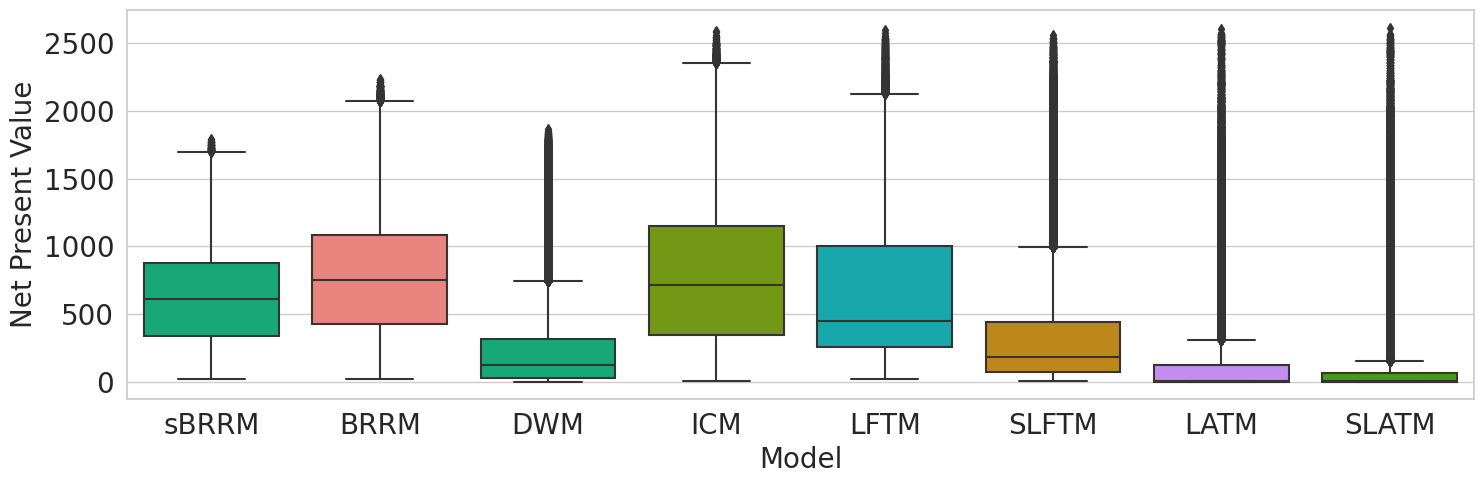

In [33]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='npv_f2', x='model', palette=cols, order=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
#plt.savefig('NetPresentValue.png')
plt.show()

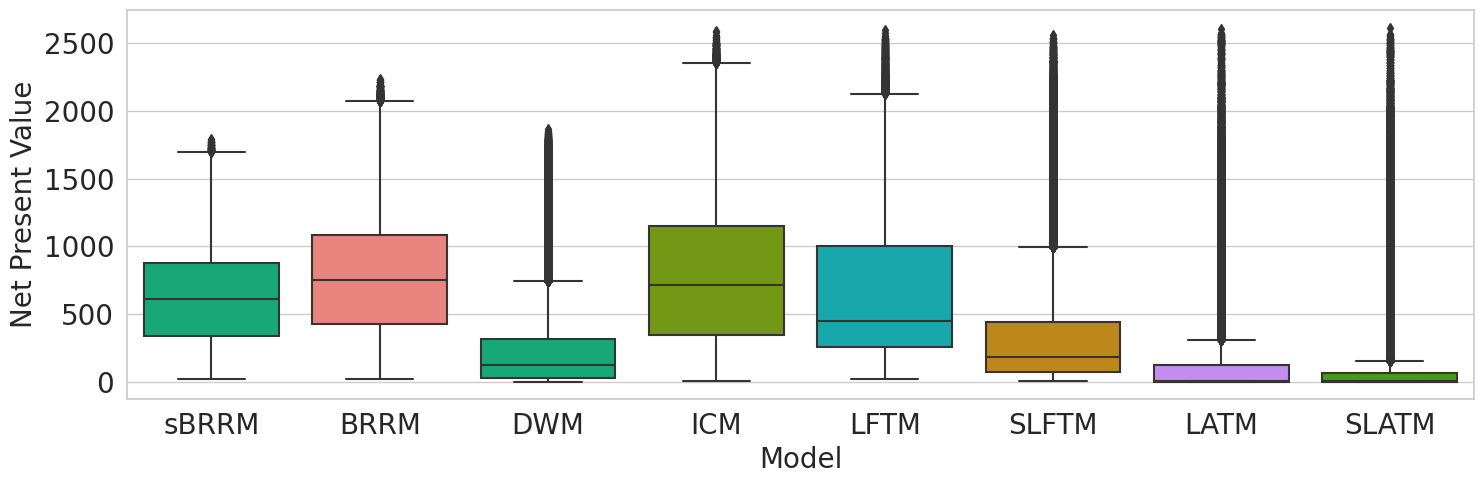

In [34]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='npv_f2', x='model', palette=cols, order=['sBRRM','BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
#plt.savefig('NetPresentValue.png')
plt.show()

In [35]:
def find_val_idx(x, val):
    for i in range(len(x)):
        if x[i] >= val:
            return i+1
    return None
df['early_2'] = df['cumsum_frac'].apply(lambda x: find_val_idx(x, 0.5))
df['mid_2'] = df['cumsum_frac'].apply(lambda x: find_val_idx(x, 0.65))
df['late_2'] = df['cumsum_frac'].apply(lambda x: find_val_idx(x, 0.75))
df[['early','early_2','mid','mid_2','late','late_2','final_frac','model']]

early  early_2  mid  mid_2  late  late_2  final_frac  model
0           43      NaN   93    NaN   375     NaN        0.12  sBRRM
1           18      NaN   40    NaN   145     NaN        0.13  sBRRM
2           14      NaN   38    NaN   110     NaN        0.13  sBRRM
3            8      NaN   20    NaN    73     NaN        0.11  sBRRM
4            6      NaN   15    NaN    47     NaN        0.11  sBRRM
...        ...      ...  ...    ...   ...     ...         ...    ...
1364575      0     1.00    1   2.00     3    4.00        0.78   BRRM
1364576      0     1.00    1   2.00     3    3.00        0.78   BRRM
1364577      0     1.00    1   2.00     2    4.00        0.77   BRRM
1364578      0     1.00    1   2.00     2    3.00        0.77   BRRM
1364579      0     1.00    1   2.00     2    3.00        0.78   BRRM

[1364580 rows x 8 columns]

In [37]:
df[['early','early_2','mid','mid_2','late','late_2','final_frac','net_percent_value','npv_f2','model']]

early  early_2  mid  mid_2  late  late_2  final_frac   
0           43      NaN   93    NaN   375     NaN        0.12  \
1           18      NaN   40    NaN   145     NaN        0.13   
2           14      NaN   38    NaN   110     NaN        0.13   
3            8      NaN   20    NaN    73     NaN        0.11   
4            6      NaN   15    NaN    47     NaN        0.11   
...        ...      ...  ...    ...   ...     ...         ...   
1364575      0     1.00    1   2.00     3    4.00        0.78   
1364576      0     1.00    1   2.00     3    3.00        0.78   
1364577      0     1.00    1   2.00     2    4.00        0.77   
1364578      0     1.00    1   2.00     2    3.00        0.77   
1364579      0     1.00    1   2.00     2    3.00        0.78   

         net_percent_value  npv_f2  model  
0                    51.28   26.29  sBRRM  
1                   124.67   77.55  sBRRM  
2                   137.10   88.88  sBRRM  
3                   135.77   93.65  sBRRM  
4                   143.50   99.57  sBRRM  
...                    ...     ...    ...  
1364575            1977.69 1852.95   BRRM  
1364576            2003.87 1878.69   BRRM  
1364577            1965.71 1860.70   BRRM  
1364578            2003.09 1896.86   BRRM  
1364579            2036.40 1941.06   BRRM  

[1364580 rows x 10 columns]

In [38]:
def calc_aggrigate(func_name, lambdafunc=None):
    aggcols_in = ['early_2', 'mid_2', 'late_2', 'final_const_state_at']
    aggcols_rename = {'final_const_state_at':f'{func_name} final','early_2':f'{func_name} early', 'mid_2':f'{func_name} mid', 'late_2':f'{func_name} late'}
    if 'max' == func_name:
        aggdf = df.groupby('model').max()
    elif 'mean' == func_name:
        aggdf = df.groupby('model').mean(numeric_only=True)
    elif 'median' == func_name:
        aggdf = df.groupby('model').median(numeric_only=True)
    elif 'sum' == func_name:
        aggdf = df.groupby('model').sum(numeric_only=True)
    elif 'count' == func_name:
        aggdf = df.groupby('model').count()
    elif 'lambda' == func_name:
        aggdf = df.groupby('model').apply(lambda x: lambdafunc(x))
    return aggdf[aggcols_in].rename(columns=aggcols_rename)

In [39]:
maxdf = calc_aggrigate('max')
maxdf

max early  max mid  max late  max final
model                                         
BRRM      961.00   884.00    671.00       3004
DWM      2054.00  1577.00    951.00       3093
ICM        12.00     6.00      5.00         19
LATM        8.00     6.00      5.00         18
LFTM       43.00    41.00     11.00         52
SLATM     201.00   254.00    178.00        502
SLFTM     986.00   797.00    307.00       1184
sBRRM    1273.00   986.00    288.00       2948

In [40]:
meandf = calc_aggrigate('mean')
meandf

mean early  mean mid  mean late  mean final
model                                             
BRRM        11.69     14.90      17.64      126.85
DWM         37.25     50.41      60.27      134.81
ICM          1.71      2.26       2.62        5.73
LATM         1.71      2.28       2.61        2.77
LFTM         2.29      3.25       3.21        6.12
SLATM       15.96     23.98      31.89       25.41
SLFTM       25.98     40.75      49.60       91.06
sBRRM       17.61     23.93      27.54      133.45

In [41]:
mediandf = calc_aggrigate('median')
mediandf

median early  median mid  median late  median final
model                                                     
BRRM           5.00        7.00         9.00         66.00
DWM           18.00       26.00        31.00         70.00
ICM            2.00        2.00         2.00          6.00
LATM           1.00        2.00         3.00          2.00
LFTM           2.00        3.00         3.00          5.00
SLATM          4.00        5.00         7.00          3.00
SLFTM         12.00       28.00        55.50         47.00
sBRRM          8.00       12.00        14.00         69.00

In [42]:
df[['final_const_state_at','final_frac','model']].groupby('model').mean().reindex(index=['LATM','ICM','LFTM','SLATM','SLFTM','sBRRM','BRRM','DWM'])

final_const_state_at  final_frac
model                                  
LATM                   2.77        0.24
ICM                    5.73        0.37
LFTM                   6.12        0.35
SLATM                 25.41        0.24
SLFTM                 91.06        0.35
sBRRM                133.45        0.50
BRRM                 126.85        0.50
DWM                  134.81        0.50

In [43]:
myout = pd.merge(calc_aggrigate('mean'), calc_aggrigate('max'), left_index=True, right_index=True)[['mean early', 'max early', 'mean mid', 'max mid', 'mean late', 'max late', 'mean final', 'max final']]

np.round(myout.sort_values('mean final'), decimals=2)

mean early  max early  mean mid  max mid  mean late  max late   
model                                                                  
LATM         1.71       8.00      2.28     6.00       2.61      5.00  \
ICM          1.71      12.00      2.26     6.00       2.62      5.00   
LFTM         2.29      43.00      3.25    41.00       3.21     11.00   
SLATM       15.96     201.00     23.98   254.00      31.89    178.00   
SLFTM       25.98     986.00     40.75   797.00      49.60    307.00   
BRRM        11.69     961.00     14.90   884.00      17.64    671.00   
sBRRM       17.61    1273.00     23.93   986.00      27.54    288.00   
DWM         37.25    2054.00     50.41  1577.00      60.27    951.00   

       mean final  max final  
model                         
LATM         2.77         18  
ICM          5.73         19  
LFTM         6.12         52  
SLATM       25.41        502  
SLFTM       91.06       1184  
BRRM       126.85       3004  
sBRRM      133.45       2948  
DWM        134.81       3093

100%|██████████| 49/49 [00:20<00:00,  2.40it/s]


net_percent_value

Pvalues:
        sBRRM  BRRM  DWM  ICM  LFTM  SLFTM  LATM  SLATM
sBRRM   0.50  0.00 1.00 1.00  1.00   1.00  1.00   0.00
BRRM    1.00  0.50 1.00 1.00  1.00   1.00  1.00   0.00
DWM     0.00  0.00 0.50 0.00  0.00   1.00  1.00   0.00
ICM     0.00  0.00 1.00 0.50  1.00   1.00  1.00   0.00
LFTM    0.00  0.00 1.00 0.00  0.50   1.00  1.00   0.00
SLFTM   0.00  0.00 0.00 0.00  0.00   0.50  1.00   0.00
LATM    0.00  0.00 0.00 0.00  0.00   0.00  0.50   0.00
SLATM   0.00  0.00 0.00 0.00  0.00   0.00  0.00   0.00

Statistic:
         sBRRM    BRRM     DWM     ICM    LFTM   SLFTM   LATM  SLATM
sBRRM    0.00  -52.59  243.01   24.43   85.75  223.76 278.01   0.00
BRRM    52.59    0.00  282.16   67.52  121.01  249.83 286.92   0.00
DWM   -243.01 -282.16    0.00 -187.62 -115.23   48.77 278.97   0.00
ICM    -24.43  -67.52  187.62    0.00   51.81  178.90 265.35   0.00
LFTM   -85.75 -121.01  115.23  -51.81    0.00  134.30 252.14   0.00
SLFTM -223.76 -249.83  -48.77 -178.90 -134.30    0.00 2

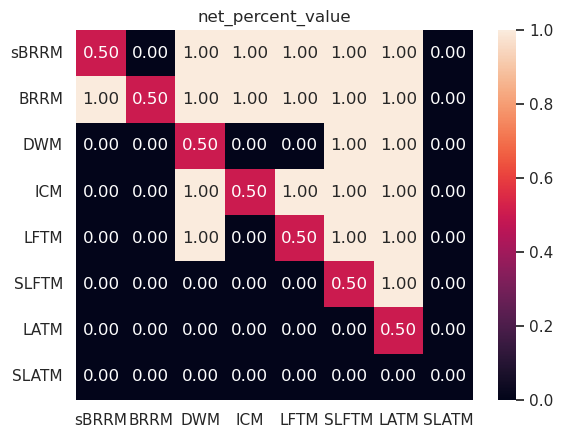

In [44]:
compare_ranksum('net_percent_value', 'less')

In [84]:
a = df[df['model'].isin(['BRRM','DWM'])][['beta','final_frac','init_infection']].groupby(['beta','init_infection']).min().rename(columns={'final_frac':'min_ff'}).reset_index()
b = df[df['model'].isin(['BRRM','DWM'])][['beta','final_frac','init_infection']].groupby(['beta','init_infection']).mean().rename(columns={'final_frac':'mean_ff'}).reset_index()
a = a.merge(b, left_on=['beta','init_infection'], right_on=['beta','init_infection'])
b = df[df['model'].isin(['BRRM','DWM'])][['beta','final_frac','init_infection']].groupby(['beta','init_infection']).max().rename(columns={'final_frac':'max_ff'}).reset_index()
a = a.merge(b, left_on=['beta','init_infection'], right_on=['beta','init_infection'])
b = reach_mean = df[df['model'].isin(['BRRM','DWM'])][['beta','final_frac','init_infection']].groupby(['beta','init_infection']).std().rename(columns={'final_frac':'std_ff'}).reset_index()
a = a.merge(b, left_on=['beta','init_infection'], right_on=['beta','init_infection'])
a

beta  init_infection  min_ff  mean_ff  max_ff  std_ff
0    0.05            0.05  0.0986   0.1247  0.1544  0.0079
1    0.05            0.10  0.1982   0.2253  0.2642  0.0091
2    0.05            0.15  0.2758   0.3107  0.3528  0.0093
3    0.05            0.20  0.3532   0.3849  0.4140  0.0091
4    0.05            0.25  0.4194   0.4509  0.4816  0.0089
..    ...             ...     ...      ...     ...     ...
128  0.95            0.15  0.6638   0.6890  0.7112  0.0083
129  0.95            0.20  0.6850   0.7122  0.7354  0.0078
130  0.95            0.25  0.7126   0.7346  0.7556  0.0073
131  0.95            0.30  0.7318   0.7560  0.7754  0.0068
132  0.95            0.35  0.7556   0.7765  0.7952  0.0065

[133 rows x 6 columns]

In [116]:
b = a.set_index(['beta','init_infection'])
print("Reachabele network size for given beta and init_infection:")
b

Reachabele network size for given beta and init_infection:


min_ff  mean_ff  max_ff  std_ff        bni
beta init_infection                                            
0.05 0.05            0.0986   0.1247  0.1544  0.0079  0.05_0.05
     0.10            0.1982   0.2253  0.2642  0.0091  0.05_0.05
     0.15            0.2758   0.3107  0.3528  0.0093  0.05_0.05
     0.20            0.3532   0.3849  0.4140  0.0091  0.05_0.05
     0.25            0.4194   0.4509  0.4816  0.0089  0.05_0.05
...                     ...      ...     ...     ...        ...
0.95 0.15            0.6638   0.6890  0.7112  0.0083  0.05_0.35
     0.20            0.6850   0.7122  0.7354  0.0078  0.05_0.35
     0.25            0.7126   0.7346  0.7556  0.0073  0.05_0.35
     0.30            0.7318   0.7560  0.7754  0.0068  0.05_0.35
     0.35            0.7556   0.7765  0.7952  0.0065  0.05_0.35

[133 rows x 5 columns]

In [119]:
df['final_frac'].apply(lambda x:) * 5000

0           528.0
1           674.0
2           507.0
3           582.0
4           573.0
            ...  
1288765    3876.0
1288766    3901.0
1288767    3835.0
1288768    3873.0
1288769    3891.0
Name: final_frac, Length: 1288770, dtype: float64

In [136]:
df['inf_reachable_frac'] = df[['beta','init_infection','final_frac']].apply(lambda row: row['final_frac'] / b.loc[row['beta'],row['init_infection']]['max_ff'], axis=1)
df[['beta','init_infection','final_frac','inf_reachable_frac']]

beta  init_infection  final_frac  inf_reachable_frac
0        0.05            0.05      0.1056              0.6839
1        0.05            0.05      0.1348              0.8731
2        0.05            0.05      0.1014              0.6567
3        0.05            0.05      0.1164              0.7539
4        0.05            0.05      0.1146              0.7422
...       ...             ...         ...                 ...
1288765  0.95            0.35      0.7752              0.9748
1288766  0.95            0.35      0.7802              0.9811
1288767  0.95            0.35      0.7670              0.9645
1288768  0.95            0.35      0.7746              0.9741
1288769  0.95            0.35      0.7782              0.9786

[1288770 rows x 4 columns]

In [142]:
b.loc[0.2,0.35]#['max_ff']

min_ff       0.5574
mean_ff      0.5857
max_ff       0.6144
std_ff        0.008
bni        0.05_0.1
Name: (0.2, 0.35), dtype: object

<AxesSubplot: xlabel='beta', ylabel='max_ff'>

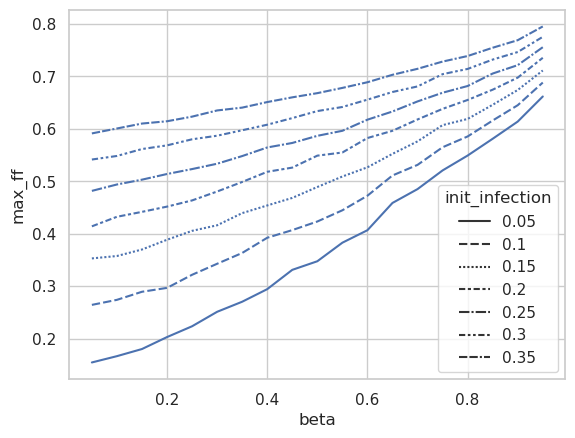

In [141]:
sns.lineplot(data=a, y='max_ff', x='beta', style='init_infection')
#sns.lineplot(data=a, y='max_ff', x='beta', style='init_infection',legend=False)
#sns.lineplot(data=a, y='min_ff', x='beta', style='init_infection',legend=False)

In [46]:
df[(df['final_frac'] > 0.95)]

Empty DataFrame
Columns: [BRRM_q, DWM_dt, DWM_q, ICM_q, LATM_t, LFTM_t, SLATM_p, SLATM_t, SLFTM_p, SLFTM_t, model, total_nodes, init_infection, beta, final_infection, total_edges, count_edges_II, count_edges_IS, count_edges_SS, count_edges_SI, count_S_nodes_with_I_neighbors, count_edges_II_prev_IS, count_edges_II_prev_SS, count_edges_IS_prev_SS, net_percent_value, early, mid, late, final_const_state_at, sim_stopped_at, InfectionAtStep, cumsum, cumsum_frac, final_frac, early_2, mid_2, late_2, npv_2, npv_f2]
Index: []

[0 rows x 39 columns]

<AxesSubplot: >

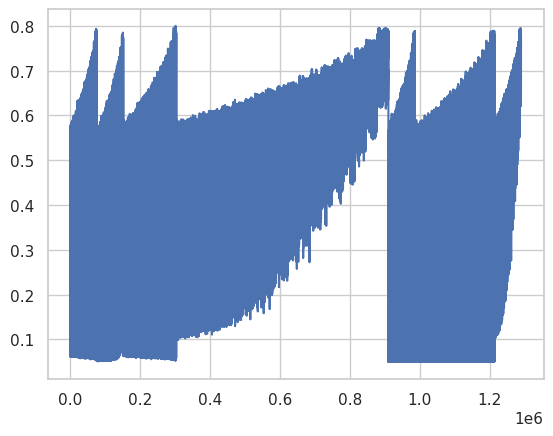

In [25]:
df['final_frac'].plot()

In [18]:
df

BRRM_q  DWM_dt  DWM_q  ICM_q  LATM_t  LFTM_t  SLATM_p  SLATM_t  \
0           NaN     NaN    NaN    NaN     NaN    0.05      NaN      NaN   
1           NaN     NaN    NaN    NaN     NaN    0.10      NaN      NaN   
2           NaN     NaN    NaN    NaN     NaN    0.15      NaN      NaN   
3           NaN     NaN    NaN    NaN     NaN    0.20      NaN      NaN   
4           NaN     NaN    NaN    NaN     NaN    0.25      NaN      NaN   
...         ...     ...    ...    ...     ...     ...      ...      ...   
1288765    0.75     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288766    0.80     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288767    0.85     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288768    0.90     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288769    0.95     NaN    NaN    NaN     NaN     NaN      NaN      NaN   

         SLFTM_p  SLFTM_t  ... sim_stopped_at  \
0            NaN      NaN  ...           2001   
1            NaN      NaN  ...           2001   
2            NaN      NaN  ...           2001   
3            NaN      NaN  ...           2001   
4            NaN      NaN  ...           2001   
...          ...      ...  ...            ...   
1288765      NaN      NaN  ...           2001   
1288766      NaN      NaN  ...           2001   
1288767      NaN      NaN  ...           2001   
1288768      NaN      NaN  ...           2001   
1288769      NaN      NaN  ...           2001   

                                           InfectionAtStep  \
0                                       [199, 68, 9, 2, 0]   
1                              [249, 107, 42, 22, 2, 2, 0]   
2                                   [176, 61, 16, 2, 2, 0]   
3                                [225, 79, 19, 4, 3, 2, 0]   
4                                [227, 72, 16, 6, 1, 1, 0]   
...                                                    ...   
1288765  [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...   
1288766  [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...   
1288767  [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...   
1288768   [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]   
1288769      [1373, 561, 144, 38, 5, 10, 7, 1, 1, 0, 1, 0]   

                                                    cumsum  \
0                                [199, 267, 276, 278, 278]   
1                      [249, 356, 398, 420, 422, 424, 424]   
2                           [176, 237, 253, 255, 257, 257]   
3                      [225, 304, 323, 327, 330, 332, 332]   
4                      [227, 299, 315, 321, 322, 323, 323]   
...                                                    ...   
1288765  [1226, 1773, 1970, 2052, 2078, 2091, 2101, 211...   
1288766  [1232, 1810, 2003, 2079, 2111, 2120, 2130, 213...   
1288767  [1280, 1821, 1984, 2044, 2066, 2071, 2074, 207...   
1288768  [1324, 1837, 2022, 2079, 2105, 2110, 2115, 211...   
1288769  [1373, 1934, 2078, 2116, 2121, 2131, 2138, 213...   

                                               cumsum_frac  final_frac  \
0                 [0.0898, 0.1034, 0.1052, 0.1056, 0.1056]      0.1056   
1        [0.0998, 0.1212, 0.1296, 0.134, 0.134400000000...      0.1348   
2          [0.0852, 0.0974, 0.1006, 0.101, 0.1014, 0.1014]      0.1014   
3        [0.095, 0.11080000000000001, 0.114600000000000...      0.1164   
4        [0.09540000000000001, 0.10980000000000001, 0.1...      0.1146   
...                                                    ...         ...   
1288765  [0.5952, 0.7046, 0.744, 0.7604, 0.765600000000...      0.7752   
1288766  [0.5964, 0.712, 0.7505999999999999, 0.7658, 0....      0.7802   
1288767  [0.606, 0.7142, 0.7467999999999999, 0.75879999...      0.7670   
1288768  [0.6148, 0.7174, 0.7544, 0.7658, 0.77099999999...      0.7746   
1288769  [0.6246, 0.7367999999999999, 0.765600000000000...      0.7782   

         early_2  mid_2  late_2      npv_2  npv_f2  
0            NaN    NaN    None   268.9480  0.0538  
1            NaN    NaN    None   

In [5]:
df[(df['model'] == 'LATM')]['final_infection'].max()#[['early','mid','late']]

NameError: name 'df' is not defined

In [203]:
df.iloc[985511]#['cumsum_frac']

BRRM_q                                                                          NaN
DWM_dt                                                                          NaN
DWM_q                                                                           NaN
ICM_q                                                                           NaN
LATM_t                                                                         1.00
LFTM_t                                                                          NaN
SLATM_p                                                                         NaN
SLATM_t                                                                         NaN
SLFTM_p                                                                         NaN
SLFTM_t                                                                         NaN
model                                                                          LATM
total_nodes                                                                 

In [152]:
# avgdf = df.groupby('model').apply(lambda x: x.count())
# avgdf

In [31]:
myout = pd.merge(meandf, maxdf, left_index=True, right_index=True)[['mean early', 'max early', 'mean mid', 'max mid', 'mean late', 'max late', 'mean final', 'max final']]
myout

mean early  max early  mean mid  max mid  mean late  max late  \
model                                                                  
BRRM         6.05        151     13.00      343      33.53      1003   
DWM         24.99        441     38.54      761      67.47      2284   
ICM          0.09          2      1.09        4       2.20        11   
LATM         0.03          6      0.65        9       0.89        12   
LFTM         0.20         28      1.25       38       2.51        43   
SLATM        3.92        180      7.43      229      13.55       418   
SLFTM       10.54        816     20.97      973      43.82      1054   

       mean final  max final  
model                         
BRRM       126.85       3004  
DWM        134.81       3093  
ICM          5.73         19  
LATM         2.77         18  
LFTM         6.12         52  
SLATM       25.41        502  
SLFTM       91.06       1184

In [32]:
np.round(myout.sort_values('mean final'), decimals=2)

mean early  max early  mean mid  max mid  mean late  max late  \
model                                                                  
LATM         0.03          6      0.65        9       0.89        12   
ICM          0.09          2      1.09        4       2.20        11   
LFTM         0.20         28      1.25       38       2.51        43   
SLATM        3.92        180      7.43      229      13.55       418   
SLFTM       10.54        816     20.97      973      43.82      1054   
BRRM         6.05        151     13.00      343      33.53      1003   
DWM         24.99        441     38.54      761      67.47      2284   

       mean final  max final  
model                         
LATM         2.77         18  
ICM          5.73         19  
LFTM         6.12         52  
SLATM       25.41        502  
SLFTM       91.06       1184  
BRRM       126.85       3004  
DWM        134.81       3093

In [59]:
calc_aggrigate('mean').T

/tmp/ipykernel_11220/1223692148.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdf = df.groupby('model').mean()


model        BRRM    DWM  ICM  LATM  LFTM  SLATM  SLFTM
mean early   6.05  24.99 0.09  0.03  0.20   3.92  10.54
mean mid    13.00  38.54 1.09  0.65  1.25   7.43  20.97
mean late   33.53  67.47 2.20  0.89  2.51  13.55  43.82
mean final 126.85 134.81 5.73  2.77  6.12  25.41  91.06

In [69]:
r = calc_aggrigate('mean').T.rank(axis=1, method='min', ascending=True)
r

/tmp/ipykernel_11220/1223692148.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggdf = df.groupby('model').mean()


model       BRRM  DWM  ICM  LATM  LFTM  SLATM  SLFTM
mean early  5.00 7.00 2.00  1.00  3.00   4.00   6.00
mean mid    5.00 7.00 2.00  1.00  3.00   4.00   6.00
mean late   5.00 7.00 2.00  1.00  3.00   4.00   6.00
mean final  6.00 7.00 2.00  1.00  3.00   4.00   5.00

[<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]

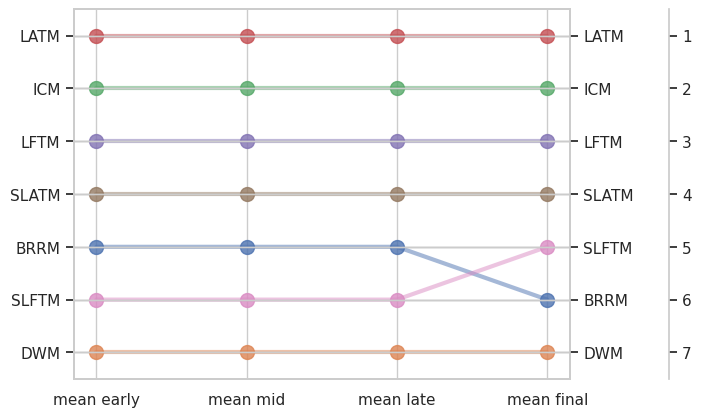

In [70]:
bumpchart(r, show_rank_axis= True, 
           rank_axis_distance= 1.2,
           ax= None, 
           scatter= True, 
           holes= False,
           line_args= {"linewidth": 3, "alpha": 0.5},
           scatter_args= {"s": 100, "alpha": 0.8},
           hole_args= {"s": 100, "alpha": 1},
            )

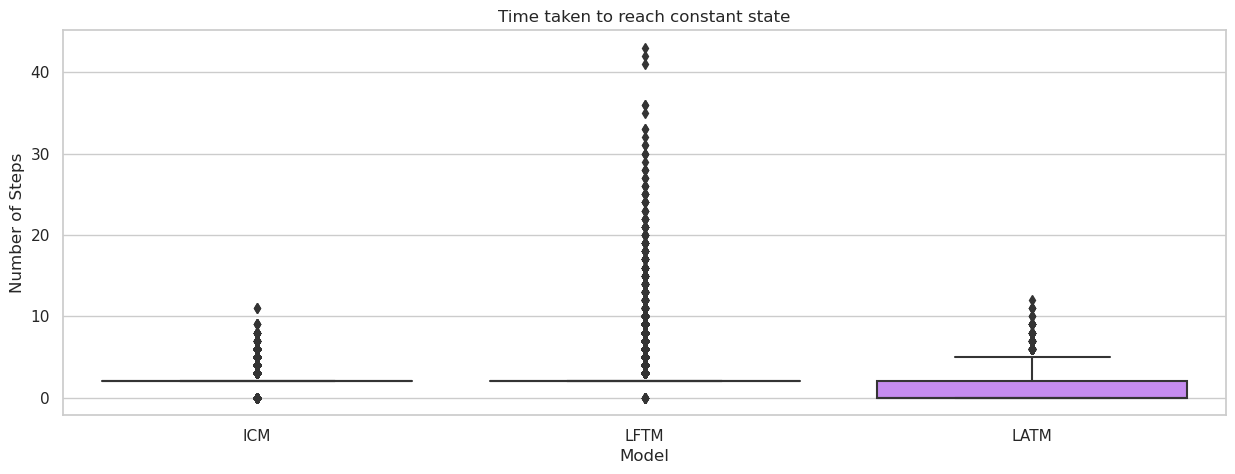

In [19]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='late', x='model', palette=cols, order=[ 'ICM', 'LFTM',  'LATM',])
plt.title('Time taken to reach constant state')
plt.ylabel('Number of Steps')
plt.xlabel('Model')
plt.show()

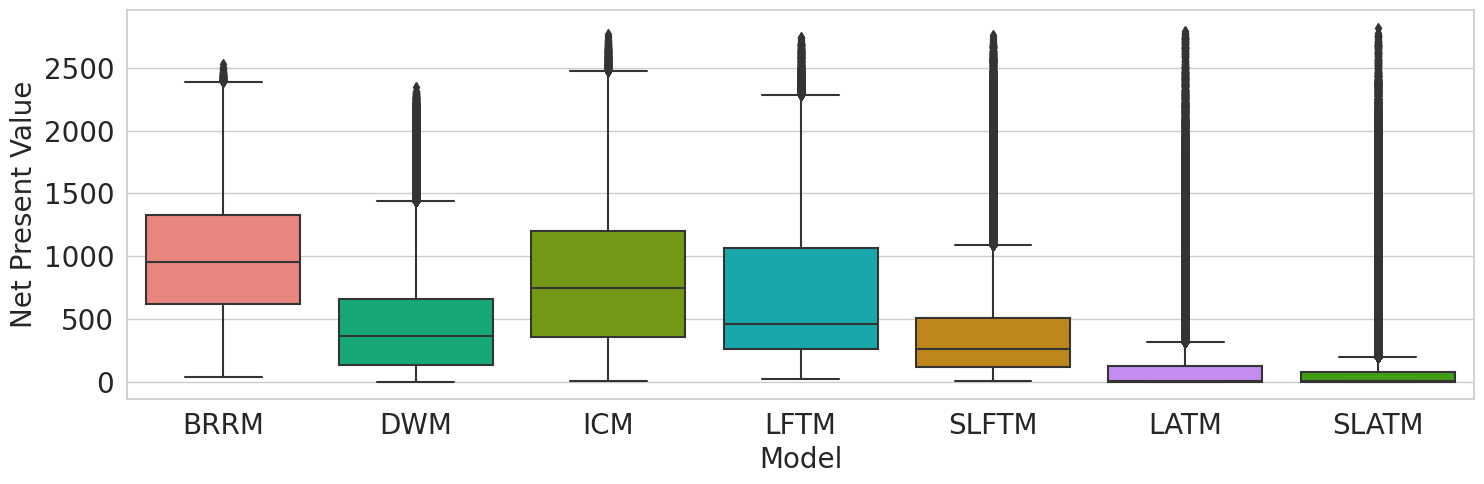

In [199]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='net_percent_value', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('NetPresentValue.png')
plt.show()

In [45]:
sd = {}
for filepath in glob.glob("./outputs/best_results_05_35_N2048/*.csv"):
    x = os.path.basename(filepath)[:-4]
    n,a = x.split("_")
    xdf = pd.read_csv(filepath)
    xdf.rename(columns={"Unnamed: 0": "Term"},inplace=True)
    if n in sd:
        sd[n][a] = xdf
    else:
        sd[n] = {a: xdf}
    
sd

{'LATM': {'S1':              Term   S1  S1_conf
  0  init_infection 0.02     0.02
  1            beta 0.36     0.07
  2          LATM_t 0.37     0.07,
  'S2':                            Term   S2  S2_conf
  0    ('init_infection', 'beta') 0.01     0.03
  1  ('init_infection', 'LATM_t') 0.01     0.03
  2            ('beta', 'LATM_t') 0.25     0.20,
  'ST':              Term   ST  ST_conf
  0  init_infection 0.06     0.01
  1            beta 0.62     0.09
  2          LATM_t 0.65     0.09},
 'DWM': {'ST':              Term   ST  ST_conf
  0  init_infection 0.09     0.01
  1            beta 0.98     0.05
  2           DWM_q 0.01     0.00
  3          DWM_dt 0.01     0.00,
  'S1':              Term    S1  S1_conf
  0  init_infection  0.01     0.02
  1            beta  0.90     0.06
  2           DWM_q -0.00     0.01
  3          DWM_dt  0.00     0.01,
  'S2':                            Term    S2  S2_conf
  0    ('init_infection', 'beta')  0.06     0.03
  1   ('init_infection', 'DWM_q') -0

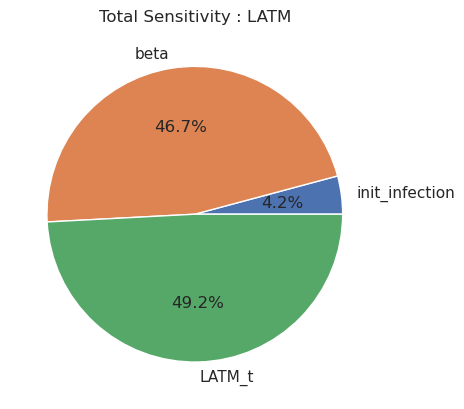

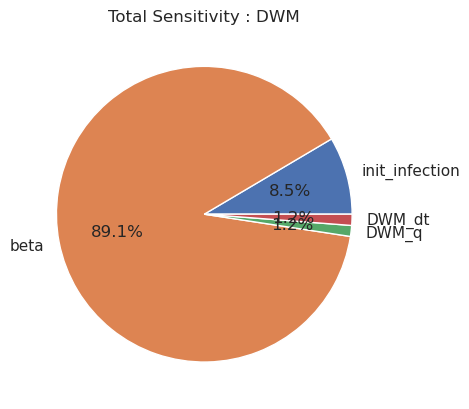

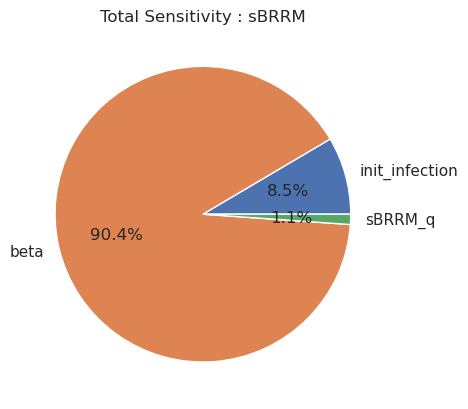

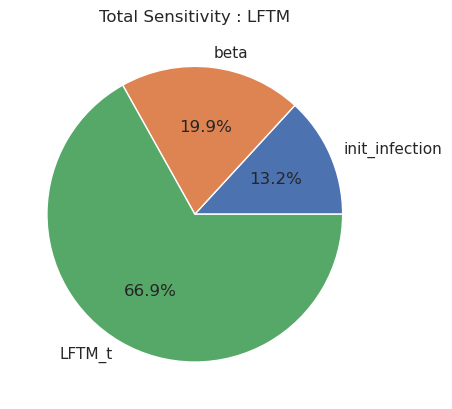

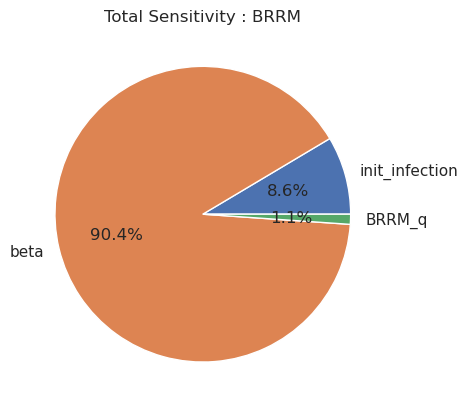

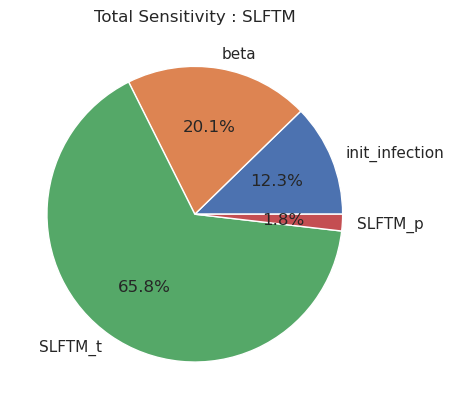

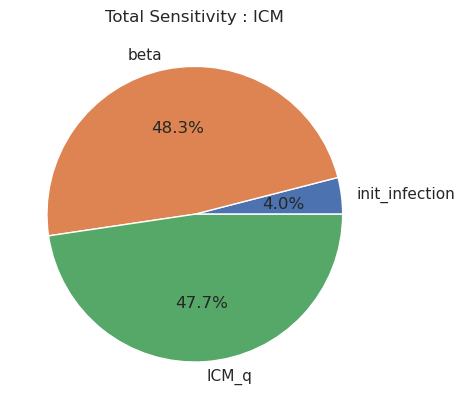

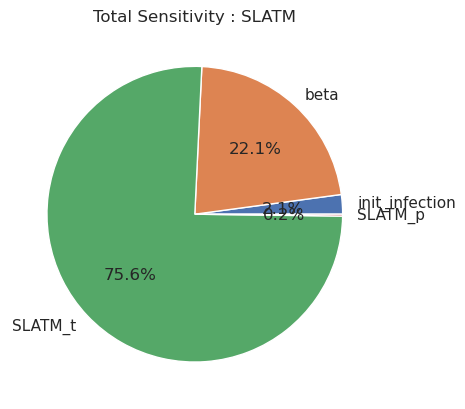

In [46]:
for m in sd:
    fig, ax = plt.subplots()
    ax.pie(sd[m]['ST']['ST'], labels=sd[m]['ST']['Term'], autopct='%1.1f%%')
    plt.title(f"Total Sensitivity : {m}")
    plt.show()

LATM


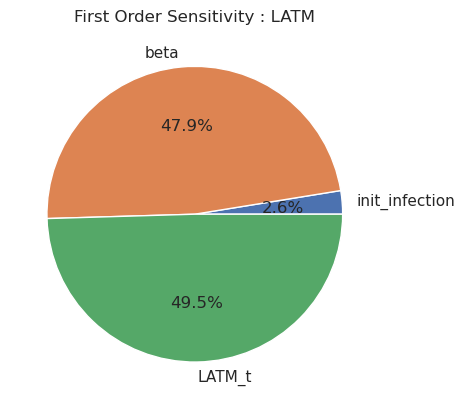

DWM


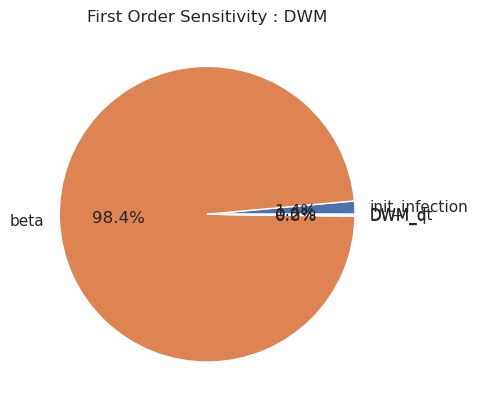

sBRRM


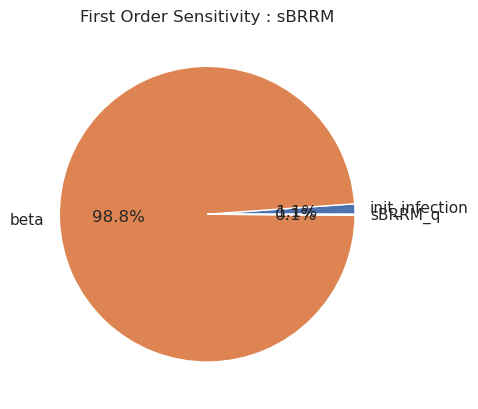

LFTM


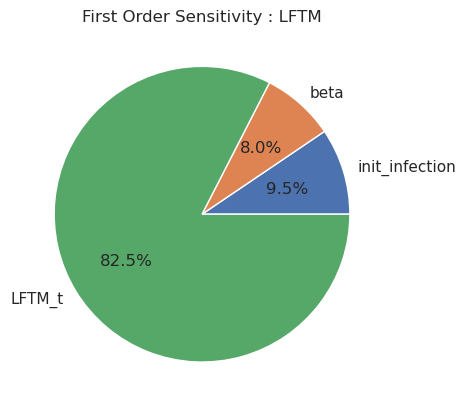

BRRM


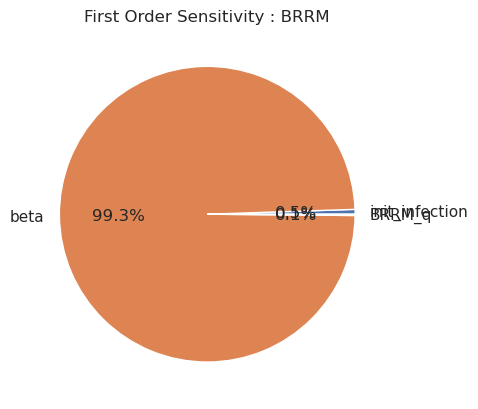

SLFTM


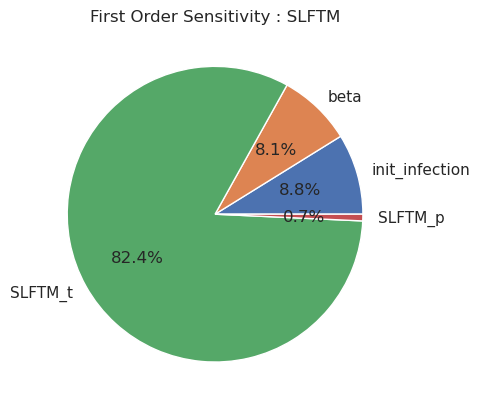

ICM


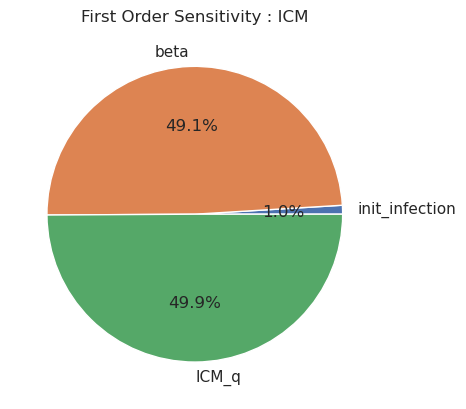

SLATM


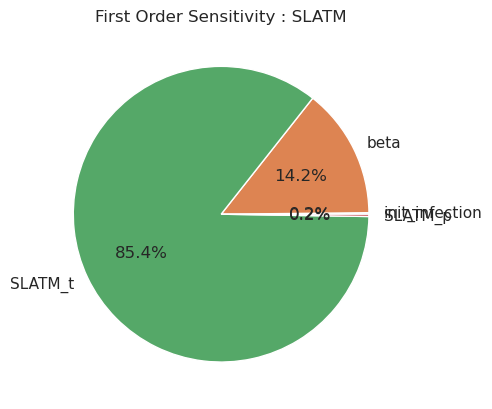

In [47]:
for m in sd:
    print(m)
    fig, ax = plt.subplots()
    ax.pie(sd[m]['S1']['S1'].abs(), labels=sd[m]['S1']['Term'], autopct='%1.1f%%')
    plt.title(f"First Order Sensitivity : {m}")
    plt.show()

LATM


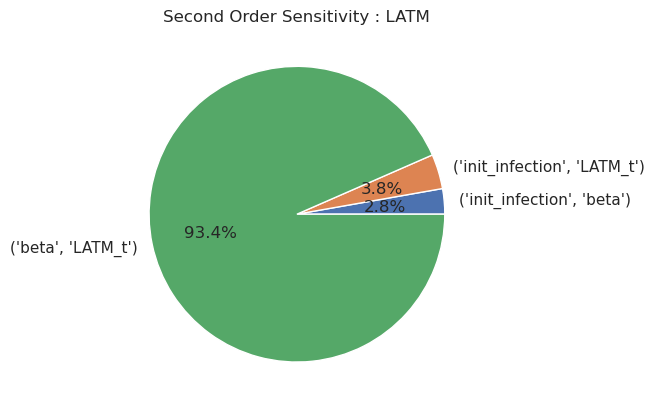

DWM


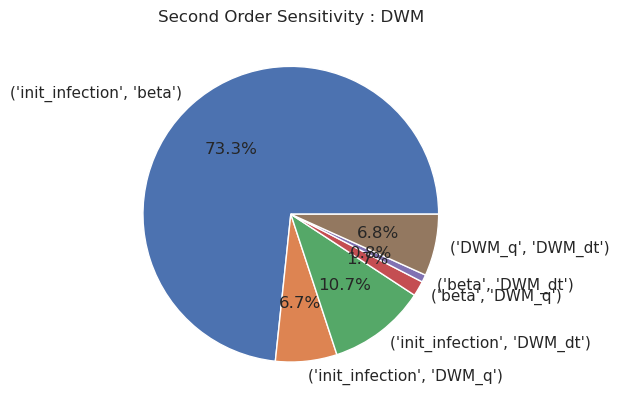

sBRRM


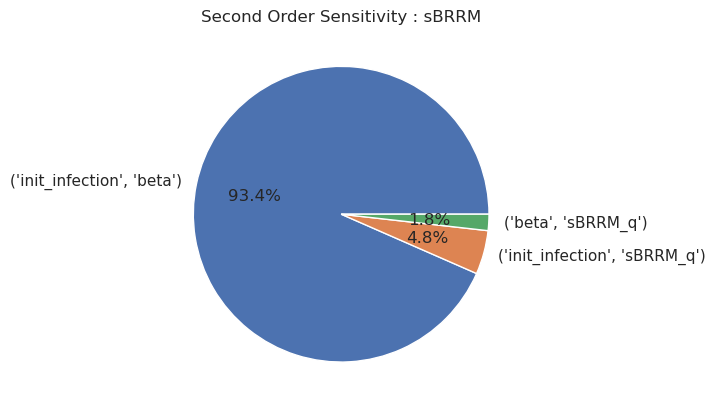

LFTM


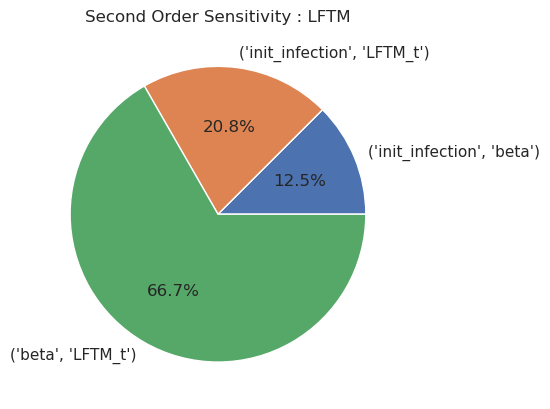

BRRM


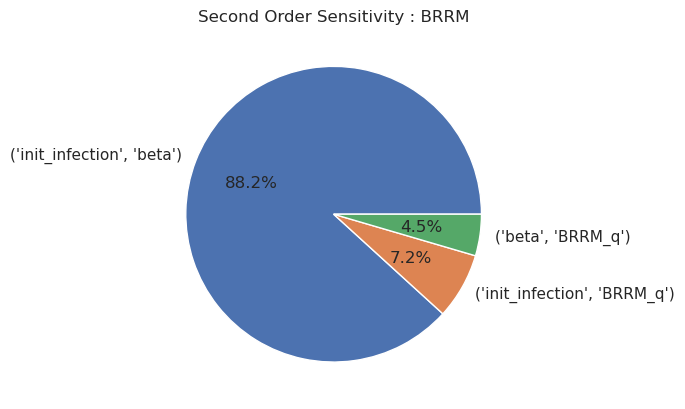

SLFTM


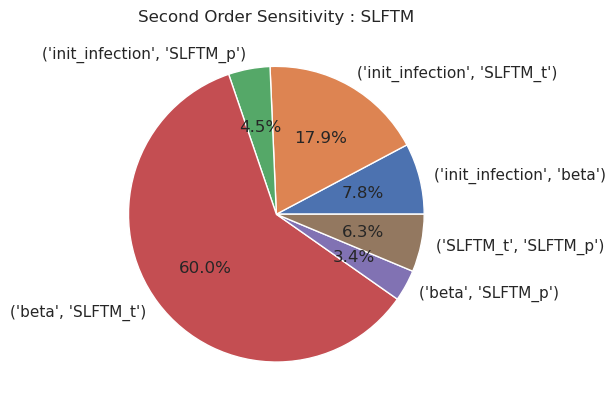

ICM


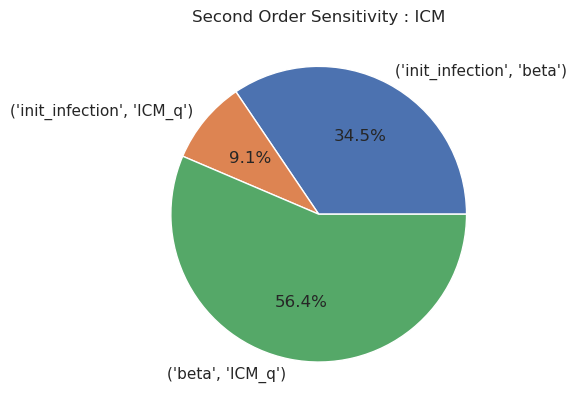

SLATM


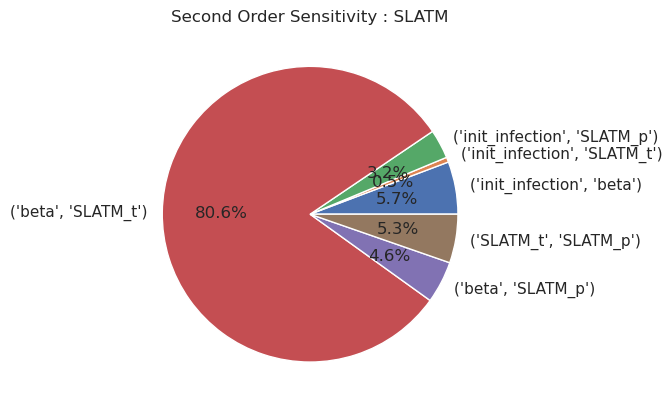

In [48]:
for m in sd:
    print(m)
    fig, ax = plt.subplots()
    ax.pie(sd[m]['S2']['S2'].abs(), labels=sd[m]['S2']['Term'], autopct='%1.1f%%')
    plt.title(f"Second Order Sensitivity : {m}")
    plt.show()

In [25]:
for modelkey in model_si:
    fig, ax = plt.subplots()
    ax.pie(model_si[modelkey]['ST'], labels=model_problem[modelkey]['names'])
    plt.title(f"ST {modelkey}")
    plt.show()

NameError: name 'model_si' is not defined

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [23]:
df['new_npv'] = df['InfectionAtStep'].apply(lambda x: np.sum([ v * (0.9 ** i) for i,v in enumerate(eval(x))]))

In [51]:
[ v * (0.9 ** i) for i,v in enumerate([199, 68, 9, 2, 0])]

[199.0, 61.2, 7.290000000000001, 1.4580000000000002, 0.0]

In [26]:
df[['net_percent_value','new_npv']]

net_percent_value      new_npv
0               268.948000   268.948000
1               397.851180   397.851180
2               246.630200   246.630200
3               317.555280   317.555280
4               310.380590   310.380590
...                    ...          ...
1288765        1977.687121  1977.687121
1288766        2003.873562  2003.873562
1288767        1965.711890  1965.711890
1288768        2003.086905  2003.086905
1288769        2036.404930  2036.404930

[1288770 rows x 2 columns]

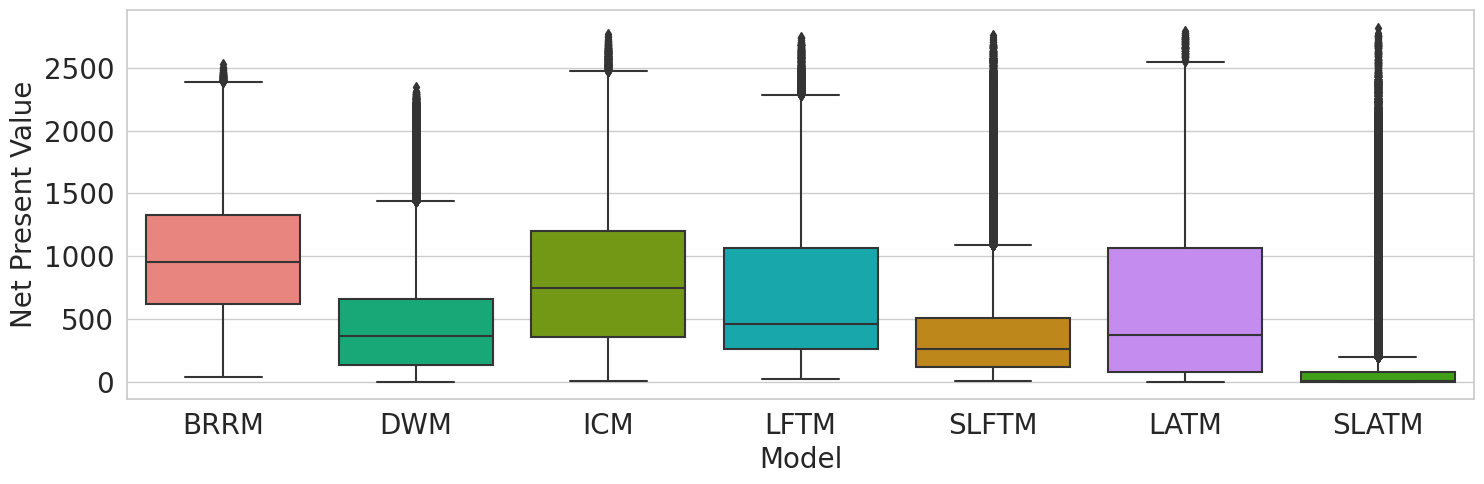

In [94]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df[(df['LATM_t'] < 5) | (df['LATM_t'].isnull())], y='new_npv', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('NetPresentValue.png')
plt.show()

In [8]:
df['early'] = df['early'].apply(lambda x: None if x == 0 else x)
df['mid'] = df['mid'].apply(lambda x: None if x == 0 else x)
df['late'] = df['late'].apply(lambda x: None if x == 0 else x)

In [11]:
df['avg_net_present_value'] = df['net_percent_value'] / df['final_const_state_at']
df[['net_percent_value','final_const_state_at','avg_net_present_value']]

net_percent_value  final_const_state_at  avg_net_present_value
0               268.948000                     5              53.789600
1               397.851180                     7              56.835883
2               246.630200                     6              41.105033
3               317.555280                     7              45.365040
4               310.380590                     7              44.340084
...                    ...                   ...                    ...
1288765        1977.687121                    16             123.605445
1288766        2003.873562                    25              80.154942
1288767        1965.711890                    19             103.458521
1288768        2003.086905                    13             154.083608
1288769        2036.404930                    12             169.700411

[1288770 rows x 3 columns]

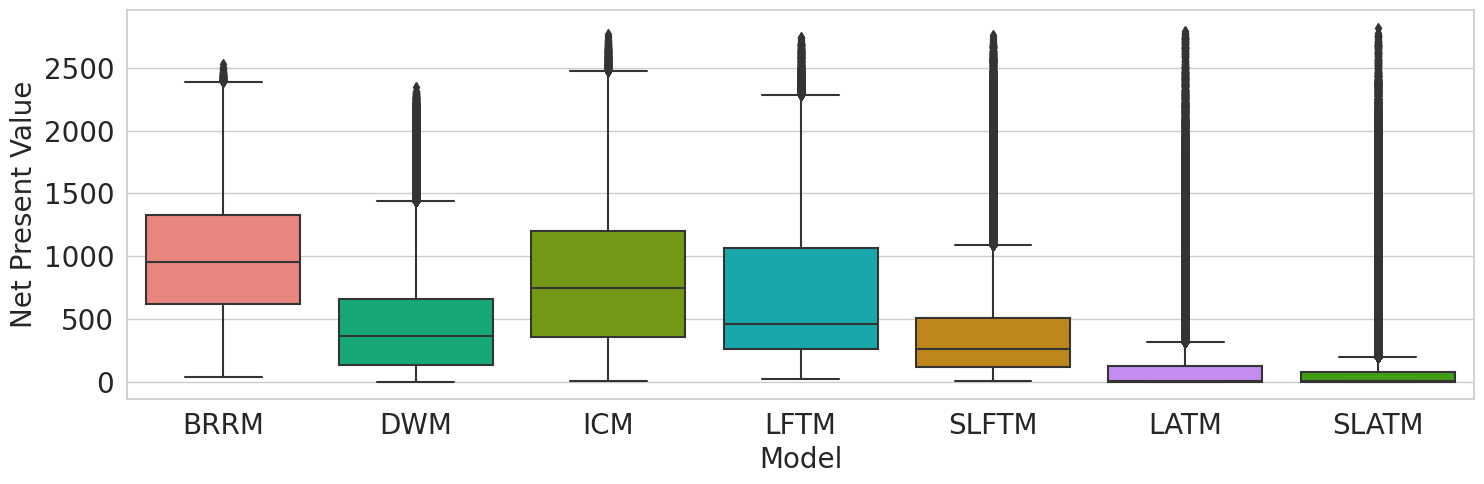

In [13]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='net_percent_value', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('NetPresentValue.png')
plt.show()

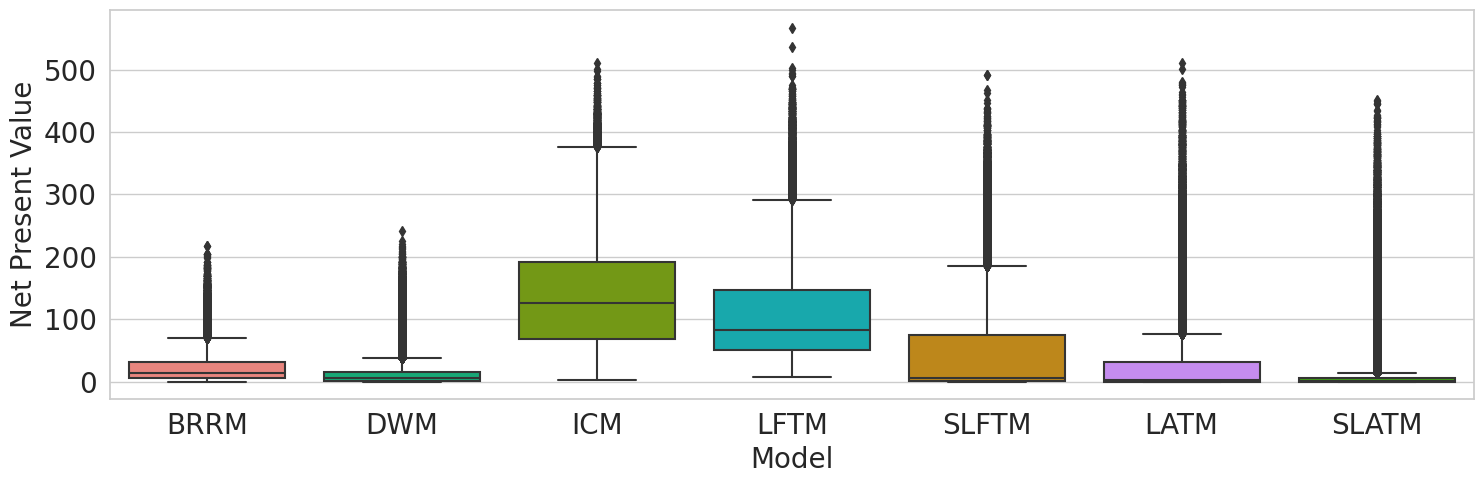

In [12]:
fig, ax = plt.subplots(figsize=(15,5))
sns.set(style='whitegrid')
sns.boxplot(data=df, y='avg_net_present_value', x='model', palette=cols, order=['BRRM','DWM', 'ICM', 'LFTM', 'SLFTM', 'LATM', 'SLATM'])
#plt.title('Net present value')
plt.ylabel('Net Present Value', fontsize=20)
plt.xlabel('Model', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tight_layout()
plt.savefig('NetPresentValue.png')
plt.show()

In [76]:
import json
import tqdm

def ReadFromJSON(in_file_path):
    with open(in_file_path, 'rb') as fin:
        json_bytes = fin.read()
    json_str = json_bytes.decode('utf-8')
    data = json.loads(json_str)
    return data

"""Use the following function to read the neighbors json file"""
def ReadNeighborsAsIntegers(in_file_path):
    # read data as string
    data = ReadFromJSON(in_file_path)
    # convert all node ids to integers
    data = {int(k):[int(e) for e in v] for k,v in data.items()}
    return data

nfl = glob.glob("./outputs/v2dynamic/*.json")

In [84]:
#import random

#avg_avg_in_degree = []
for f in tqdm.tqdm(random.sample(nfl, 1000)):
    n = ReadNeighborsAsIntegers(f)
    avg_in_degree = np.mean([len(x) for x in n.values()])
    avg_avg_in_degree.append(avg_in_degree)

100%|██████████| 1000/1000 [00:16<00:00, 60.05it/s]


In [85]:
np.mean(avg_avg_in_degree)

5.117306182612573

In [86]:
len(avg_avg_in_degree)

3000

In [93]:
df

BRRM_q  DWM_dt  DWM_q  ICM_q  LATM_t  LFTM_t  SLATM_p  SLATM_t  \
0           NaN     NaN    NaN    NaN     NaN    0.05      NaN      NaN   
1           NaN     NaN    NaN    NaN     NaN    0.10      NaN      NaN   
2           NaN     NaN    NaN    NaN     NaN    0.15      NaN      NaN   
3           NaN     NaN    NaN    NaN     NaN    0.20      NaN      NaN   
4           NaN     NaN    NaN    NaN     NaN    0.25      NaN      NaN   
...         ...     ...    ...    ...     ...     ...      ...      ...   
1288765    0.75     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288766    0.80     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288767    0.85     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288768    0.90     NaN    NaN    NaN     NaN     NaN      NaN      NaN   
1288769    0.95     NaN    NaN    NaN     NaN     NaN      NaN      NaN   

         SLFTM_p  SLFTM_t  ... count_edges_II_prev_SS  count_edges_IS_prev_SS  \
0            NaN      NaN  ...               0.016040                0.000000   
1            NaN      NaN  ...               0.038572                0.000191   
2            NaN      NaN  ...               0.016422                0.000764   
3            NaN      NaN  ...               0.021768                0.001337   
4            NaN      NaN  ...               0.020050                0.002291   
...          ...      ...  ...                    ...                     ...   
1288765      NaN      NaN  ...               0.257214                0.000000   
1288766      NaN      NaN  ...               0.291755                0.000000   
1288767      NaN      NaN  ...               0.253513                0.000000   
1288768      NaN      NaN  ...               0.260406                0.000000   
1288769      NaN      NaN  ...               0.260306                0.000000   

         net_percent_value  early  mid  late  final_const_state_at  \
0               268.948000    NaN  1.0   2.0                     5   
1               397.851180    NaN  1.0   3.0                     7   
2               246.630200    NaN  1.0   2.0                     6   
3               317.555280    NaN  1.0   2.0                     7   
4               310.380590    NaN  1.0   2.0                     7   
...                    ...    ...  ...   ...                   ...   
1288765        1977.687121    NaN  1.0   3.0                    16   
1288766        2003.873562    NaN  1.0   3.0                    25   
1288767        1965.711890    NaN  1.0   2.0                    19   
1288768        2003.086905    NaN  1.0   2.0                    13   
1288769        2036.404930    NaN  1.0   2.0                    12   

         sim_stopped_at                                    InfectionAtStep  \
0                  2001                                 [199, 68, 9, 2, 0]   
1                  2001                        [249, 107, 42, 22, 2, 2, 0]   
2                  2001                             [176, 61, 16, 2, 2, 0]   
3                  2001                          [225, 79, 19, 4, 3, 2, 0]   
4                  2001                          [227, 72, 16, 6, 1, 1, 0]   
...                 ...                                                ...   
1288765            2001  [1226, 547, 197, 82, 26, 13, 10, 9, 6, 1, 2, 3...   
1288766            2001  [1232, 578, 193, 76, 32, 9, 10, 7, 4, 6, 2, 0,...   
1288767            2001  [1280, 541, 163, 60, 22, 5, 3, 2, 3, 1, 1, 2, ...   
1288768            2001   [1324, 513, 185, 57, 26, 5, 5, 4, 0, 2, 0, 2, 0]   
1288769            2001      [1373, 561, 144, 38, 5, 10, 7, 1, 1, 0, 1, 0]   

             new_npv  
0         268.948000  
1         397.851180  
2         246.630200  
3         317.555280  
4         310.380590  
...              ...  
1288765  1977.687121  
1288766  2003.873562  
1288767  1965.711890  
1288768  2003.086905  
1288769  2036.404930  

[1228920 rows x 32 columns]

In [16]:
import pandas as pd
import glob

f1 = glob.glob('./outputs/temp/*.csv')
print(f1)
f2 = glob.glob('./outputs/best_results_05_35_N2048/*.csv')
print(f2)

['./outputs/temp/LATM_S1.csv', './outputs/temp/DWM_ST.csv', './outputs/temp/LFTM_S1.csv', './outputs/temp/DWM_S1.csv', './outputs/temp/BRRM_S2.csv', './outputs/temp/SLFTM_S2.csv', './outputs/temp/LFTM_ST.csv', './outputs/temp/LATM_S2.csv', './outputs/temp/ICM_S2.csv', './outputs/temp/ICM_S1.csv', './outputs/temp/BRRM_S1.csv', './outputs/temp/SLATM_S1.csv', './outputs/temp/DWM_S2.csv', './outputs/temp/SLATM_ST.csv', './outputs/temp/LFTM_S2.csv', './outputs/temp/BRRM_ST.csv', './outputs/temp/SLFTM_S1.csv', './outputs/temp/ICM_ST.csv', './outputs/temp/SLFTM_ST.csv', './outputs/temp/SLATM_S2.csv', './outputs/temp/LATM_ST.csv']
['./outputs/best_results_05_35_N2048/LATM_S1.csv', './outputs/best_results_05_35_N2048/DWM_ST.csv', './outputs/best_results_05_35_N2048/LFTM_S1.csv', './outputs/best_results_05_35_N2048/DWM_S1.csv', './outputs/best_results_05_35_N2048/BRRM_S2.csv', './outputs/best_results_05_35_N2048/SLFTM_S2.csv', './outputs/best_results_05_35_N2048/LFTM_ST.csv', './outputs/best_res

In [ ]:
pd.read_csv()